# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
%R require(movMF)

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path,  NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt'# unit shift, 2; 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?; time irregular
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt'
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path= 'D:/data/asos/olympia_WA/hr_avg.csv'
# file_path= 'D:/data/asos/olympia_WA/minute_avg.csv'
# file_path= 'D:/data/asos/topeka_KS/hr_avg.csv' # High 0
# file_path, bandwidth = 'D:/data/asos/topeka_KS/minute_avg.csv', 0.9 

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
# file_path= 'data/ECMWF/usa/47N123W/dat.csv'
file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.4, 4 #good
# file_path= 'data/ECMWF/venezuela/8N67W/dat.csv' # good, but the data might be problematic.
# file_path = 'D:/ECMWF/8N68W/dat.csv' 
# file_path = 'D:/ECMWF/9N68W/dat.csv' 
# file_path = 'data/ECMWF/chile/52S75W/dat.csv' # good
# file_path = 'data/ECMWF/iceland/65N17W/dat.csv' # good
# file_path, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 4 # good
# file_path= 'data/ECMWF/sudan/18N32E/dat.csv' # good, good for angular linear
# file_path= 'data/ECMWF/china/24N121E/dat.csv'# good
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 5 

# Comparison with On the select of ...
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Andors, good accordance, good
# file_path= 'D:/data/ECMWF/36N25E/dat.csv' # Crete, bad accordance
# file_path= 'D:/data/ECMWF/37N22E/dat.csv' # Pylos, general good accordance
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Zak, bad accordance
# file_path= 'D:/data/ECMWF/36.75N2.25W/dat.csv' # Cabo de Gata, general good accordance
# file_path= 'data/ECMWF/portugal/36N5W/dat.csv' # Mar de Alboran, bad accordance

# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'd:/data/portus/cabo_de_gata/dat.csv', 4, 0.7 # need to remove 0 speed
# file_path = 'd:/data/portus/alboran/dat.csv' # problem data

# USA Comparison
# file_path = 'd:/data/ECMWF/47.25N102.75W/dat.csv' # Green R, good accordance
# file_path= 'd:/data/ECMWF/48.75N98.25W/dat.csv' # Olga, good accordance
# file_path= 'd:/data/ECMWF/48N103W/dat.csv' # Ray W, bag accordance

# US offshore
# file_path = 'D:/NDBC/46086/10_min.csv' # strong directionality
# file_path = 'D:/NDBC/42057/10_min.csv' # strong directionality
# file_path = 'D:/NDBC/46014/10_min.csv' # strong directionality, too weird
# file_path = 'D:/NDBC/cdrf1/10_min.csv' 
# file_path = 'D:/NDBC/46081/10_min.csv'  # strong directionality
# file_path = 'D:/NDBC/44013/10_min.csv' 

# file_path = 'D:/data/ECMWF/32N118W/dat.csv' #46086
# file_path = 'D:/data/ECMWF/17N81W/dat.csv' # 42057
# file_path = 'D:/data/ECMWF/39N124W/dat.csv' # 46014
# file_path = 'D:/data/ECMWF/29N83W/dat.csv' #cdrf1
# file_path = 'D:/data/ECMWF/61N148W/dat.csv' #46081, big difference with NDBC
# file_path = 'D:/data/ECMWF/42N71W/dat.csv' #44013

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type']]
    integer_data = True
    detect_sample_time = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
elif 'asos' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False # may have some problem
    knot_unit = True
    convert_to_knot = False
elif 'NDBC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = True
elif 'portus' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df['time']=pd.to_datetime(df['time'])
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
else:
    # ECMWF
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x, df.y=-df.x, -df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    cartesian = True
    convert_to_knot = False
    BIN_WIDTH=0.5

In [4]:
df.dropna(subset=['dir','speed'], inplace=True)
if 'knot_unit' not in globals():
    knot_unit = False
if 'cartesian' not in globals():
    cartesian = False
if not {'type', 'wind_type'}.issubset(df.columns):
    df['type']='default'
    df['wind_type']='default'
if 'detect_sample_time' not in globals():
    detect_sample_time = False
if 'BIN_WIDTH' not in globals():
    BIN_WIDTH = 1
df

time        lat         lon         x         y  \
0     1979-01-01 00:00:00  47.000004  237.000015  2.647999  0.267029   
1     1979-01-01 06:00:00  47.000004  237.000015  3.995660 -0.144256   
2     1979-01-01 12:00:00  47.000004  237.000015  3.473003 -0.148026   
3     1979-01-01 18:00:00  47.000004  237.000015  4.140249 -0.252757   
4     1979-01-02 00:00:00  47.000004  237.000015  3.594884 -0.379231   
5     1979-01-02 06:00:00  47.000004  237.000015  2.746273 -0.223362   
6     1979-01-02 12:00:00  47.000004  237.000015  2.730588 -0.236722   
7     1979-01-02 18:00:00  47.000004  237.000015  3.165043 -0.074385   
8     1979-01-03 00:00:00  47.000004  237.000015  2.419378 -0.246756   
9     1979-01-03 06:00:00  47.000004  237.000015  2.862289 -0.340428   
10    1979-01-03 12:00:00  47.000004  237.000015  3.044513 -0.086254   
11    1979-01-03 18:00:00  47.000004  237.000015  3.830171  0.351548   
12    1979-01-04 00:00:00  47.000004  237.000015  3.335711  0.394578   
13    1979-01-04 06:00:00  47.000004  237.000015  4.174526  0.585728   
14    1979-01-04 12:00:00  47.000004  237.000015  4.058359  0.528861   
15    1979-01-04 18:00:00  47.000004  237.000015  4.325488  0.224195   
16    1979-01-05 00:00:00  47.000004  237.000015  3.402502  0.000142   
17    1979-01-05 06:00:00  47.000004  237.000015  3.837243  0.146394   
18    1979-01-05 12:00:00  47.000004  237.000015  4.046267  0.215382   
19    1979-01-05 18:00:00  47.000004  237.000015  4.108260  0.444252   
20    1979-01-06 00:00:00  47.000004  237.000015  3.349026  0.390269   
21    1979-01-06 06:00:00  47.000004  237.000015  3.633429  0.062893   
22    1979-01-06 12:00:00  47.000004  237.000015  3.118314 -0.074798   
23    1979-01-06 18:00:00  47.000004  237.000015  3.809524 -0.161539   
24    1979-01-07 00:00:00  47.000004  237.000015  3.085909 -0.192037   
25    1979-01-07 06:00:00  47.000004  237.000015  3.664690 -0.083538   
26    1979-01-07 12:00:00  47.000004  237.000015  3.382452 -0.264118   
27    1979-01-07 18:00:00  47.000004  237.000015  3.944830 -0.433693   
28    1979-01-08 00:00:00  47.000004  237.000015  3.127045 -0.206463   
29    1979-01-08 06:00:00  47.000004  237.000015  3.724320 -0.719214   
...                   ...        ...         ...       ...       ...   
55614 2017-01-24 12:00:00  47.000004  237.000015  1.086352  0.086252   
55615 2017-01-24 18:00:00  47.000004  237.000015  0.560820 -1.798263   
55616 2017-01-25 00:00:00  47.000004  237.000015 -0.626857 -0.807715   
55617 2017-01-25 06:00:00  47.000004  237.000015  0.759055 -0.525668   
55618 2017-01-25 12:00:00  47.000004  237.000015  1.200475 -0.884055   
55619 2017-01-25 18:00:00  47.000004  237.000015  1.677295 -2.362282   
55620 2017-01-26 00:00:00  47.000004  237.000015 -0.320672 -0.902915   
55621 2017-01-26 06:00:00  47.000004  237.000015  0.903521 -0.664626   
55622 2017-01-26 12:00:00  47.000004  237.000015  1.143721 -0.732172   
55623 2017-01-26 18:00:00  47.000004  237.000015  0.907468 -0.859518   
55624 2017-01-27 00:00:00  47.000004  237.000015  0.155235 -1.132799   
55625 2017-01-27 06:00:00  47.000004  237.000015  1.298310 -1.043114   
55626 2017-01-27 12:00:00  47.000004  237.000015  2.244130 -0.784854   
55627 2017-01-27 18:00:00  47.000004  237.000015  2.385641 -1.353739   
55628 2017-01-28 00:00:00  47.000004  237.000015  0.973621 -1.108333   
55629 2017-01-28 06:00:00  47.000004  237.000015  1.821739 -1.481803   
55630 2017-01-28 12:00:00  47.000004  237.000015  2.432666 -1.341209   
55631 2017-01-28 18:00:00  47.000004  237.000015  1.528744 -2.952466   
55632 2017-01-29 00:00:00  47.000004  237.000015  1.168126 -1.802726   
55633 2017-01-29 06:00:00  47.000004  237.000015  1.314004 -1.955485   
55634 2017-01-29 12:00:00  47.000004  237.000015  1.522460 -2.221667   
55635 2017-01-29 18:00:00  47.000004  237.000015 -0.413008 -5.020831   
55636 2017-01-30 00:00:00  47.000004  237.000015 -0.982927 -3.730390   
55637 2017-01-30 06:00:00  47.000004  237.000015 -0.351251 -1

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 99) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


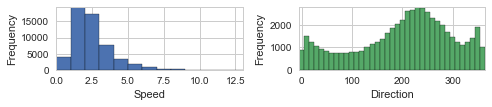

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat           lon             x             y         speed  \
count  5.552000e+04  5.552000e+04  55520.000000  55520.000000  55520.000000   
mean   4.700000e+01  2.370000e+02     -0.321844     -0.884809      2.487596   
std    3.119311e-11  1.956284e-10      1.807192      1.964791      1.350773   
min    4.700000e+01  2.370000e+02     -9.166093    -11.388456      0.010145   
25%    4.700000e+01  2.370000e+02     -1.597408     -1.977554      1.599009   
50%    4.700000e+01  2.370000e+02     -0.498411     -0.653762      2.178386   
75%    4.700000e+01  2.370000e+02      1.110799      0.476234      3.057293   
max    4.700000e+01  2.370000e+02      6.508003      4.706675     12.387152   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     202.258338  1.997567e+07    900.000000    188.846128  
std       95.811944  1.096640e+05    670.826435     86.670238  
min        0.002391  1.979010e+07      0.000000      0.002385  
25%      143.279492  1.988070e+07    450.000000    118.751850  
50%      217.561220  1.997567e+07    900.000000    199.535223  
75%      271.516374  2.007070e+07   1350.000000    251.826329  
max      359.992136  2.016123e+07   1800.000000    359.994014

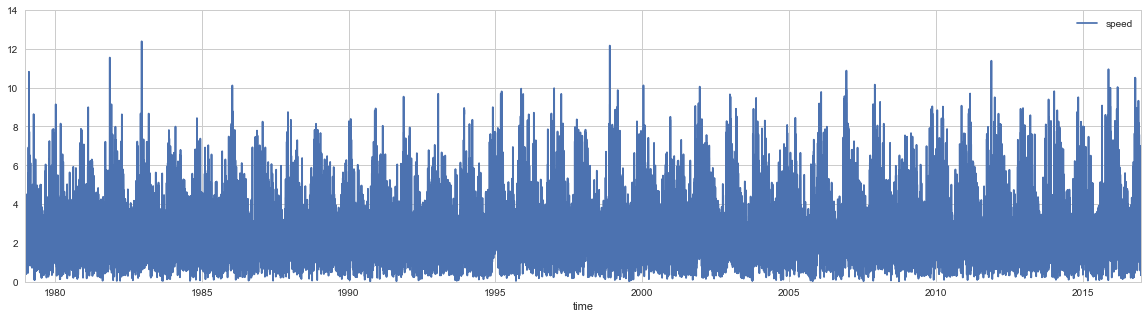

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if cartesian == True:
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

In [9]:
if "portus" in file_path: 
    df = df.query('speed >0 ')

In [10]:
df['dir'] = df['dir_windrose']

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


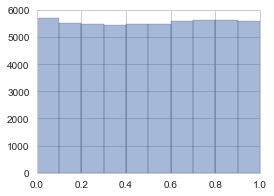

In [11]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [12]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    bare_speed_unit_text = ' knot'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    bare_speed_unit_text = ' m/s'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

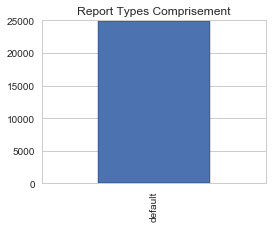

In [13]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

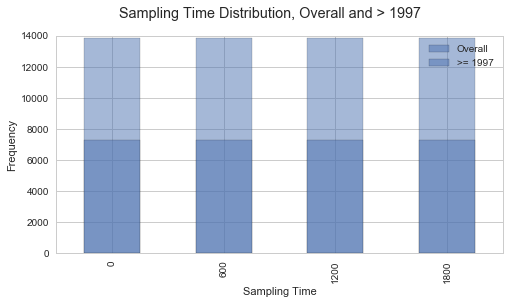

In [14]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

In [15]:
if detect_sample_time:
    df['sample_time'] = df.HrMn % 100 
    sample_time = df['2000':]['sample_time']
    sample_times = sample_time.value_counts()[sample_time.value_counts() > 1000]
    sample_times = sample_times.index.tolist()
    # df = df.query("sample_time in @sample_times")
    df = df.query("sample_time == @sample_times[0]")
    df.drop(['sample_time'], 1,inplace=True)
    print(sample_times)

    df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))
else:
    sample_times = 'Default'

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [16]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat         lon         x          y      speed  \
time                                                                         
1982-12-16 12:00:00  47.000004  237.000015 -4.872845 -11.388456  12.387152   
1998-11-24 06:00:00  47.000004  237.000015 -4.351872 -11.361810  12.166738   
1981-11-14 18:00:00  47.000004  237.000015 -3.831520 -10.895861  11.549906   
2011-11-22 12:00:00  47.000004  237.000015 -3.232797 -10.918585  11.387119   
2015-11-17 18:00:00  47.000004  237.000015 -6.895266  -8.504111  10.948269   
2006-12-15 06:00:00  47.000004  237.000015 -4.680619  -9.819065  10.877602   
1979-02-13 12:00:00  47.000004  237.000015 -2.932448 -10.413043  10.818074   
2016-10-16 00:00:00  47.000004  237.000015 -2.071875 -10.308027  10.514185   
2016-10-14 18:00:00  47.000004  237.000015 -2.335077 -10.223928  10.487196   
2007-12-03 12:00:00  47.000004  237.000015 -3.328640  -9.594584  10.155584   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1982-12-16 12:00:00  203.164910  19821216  1200  default   default   
1998-11-24 06:00:00  200.958156  19981124   600  default   default   
1981-11-14 18:00:00  199.374179  19811114  1800  default   default   
2011-11-22 12:00:00  196.493074  20111122  1200  default   default   
2015-11-17 18:00:00  219.035677  20151117  1800  default   default   
2006-12-15 06:00:00  205.486524  20061215   600  default   default   
1979-02-13 12:00:00  195.727910  19790213  1200  default   default   
2016-10-16 00:00:00  191.364807  20161016     0  default   default   
2016-10-14 18:00:00  192.865306  20161014  1800  default   default   
2007-12-03 12:00:00  199.133147  20071203  1200  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1982-12-16 12:00:00    203.164910  4.575802       5.597248  
1998-11-24 06:00:00    200.958156  4.464485       4.343008  
1981-11-14 18:00:00    199.374179  3.309410       3.852045  
2011-11-22 12:00:00    196.493074  3.792564       7.633285  
2015-11-17 18:00:00    219.035677  3.288520       1.574211  
2006-12-15 06:00:00    205.486524  2.668074       3.057258  
1979-02-13 12:00:00    195.727910  2.479248       4.581365  
2016-10-16 00:00:00    191.364807  5.549624       6.458054  
2016-10-14 18:00:00    192.865306  2.197611       3.317213  
2007-12-03 12:00:00    199.133147  4.017422       0.721097

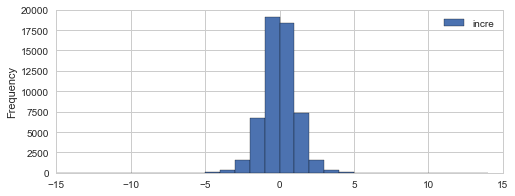

In [17]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [18]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0


lat         lon         x          y      speed  \
time                                                                         
1982-12-16 12:00:00  47.000004  237.000015 -4.872845 -11.388456  12.387152   
1998-11-24 06:00:00  47.000004  237.000015 -4.351872 -11.361810  12.166738   
1981-11-14 18:00:00  47.000004  237.000015 -3.831520 -10.895861  11.549906   
2011-11-22 12:00:00  47.000004  237.000015 -3.232797 -10.918585  11.387119   
2015-11-17 18:00:00  47.000004  237.000015 -6.895266  -8.504111  10.948269   
2006-12-15 06:00:00  47.000004  237.000015 -4.680619  -9.819065  10.877602   
1979-02-13 12:00:00  47.000004  237.000015 -2.932448 -10.413043  10.818074   
2016-10-16 00:00:00  47.000004  237.000015 -2.071875 -10.308027  10.514185   
2016-10-14 18:00:00  47.000004  237.000015 -2.335077 -10.223928  10.487196   
2007-12-03 12:00:00  47.000004  237.000015 -3.328640  -9.594584  10.155584   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1982-12-16 12:00:00  203.164910  19821216  1200  default   default   
1998-11-24 06:00:00  200.958156  19981124   600  default   default   
1981-11-14 18:00:00  199.374179  19811114  1800  default   default   
2011-11-22 12:00:00  196.493074  20111122  1200  default   default   
2015-11-17 18:00:00  219.035677  20151117  1800  default   default   
2006-12-15 06:00:00  205.486524  20061215   600  default   default   
1979-02-13 12:00:00  195.727910  19790213  1200  default   default   
2016-10-16 00:00:00  191.364807  20161016     0  default   default   
2016-10-14 18:00:00  192.865306  20161014  1800  default   default   
2007-12-03 12:00:00  199.133147  20071203  1200  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1982-12-16 12:00:00    203.164910  4.575802       5.597248  
1998-11-24 06:00:00    200.958156  4.464485       4.343008  
1981-11-14 18:00:00    199.374179  3.309410       3.852045  
2011-11-22 12:00:00    196.493074  3.792564       7.633285  
2015-11-17 18:00:00    219.035677  3.288520       1.574211  
2006-12-15 06:00:00    205.486524  2.668074       3.057258  
1979-02-13 12:00:00    195.727910  2.479248       4.581365  
2016-10-16 00:00:00    191.364807  5.549624       6.458054  
2016-10-14 18:00:00    192.865306  2.197611       3.317213  
2007-12-03 12:00:00    199.133147  4.017422       0.721097

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [19]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.002385      1
0.016946      1
0.021871      1
0.025272      1
0.057130      1
0.070663      1
0.079098      1
0.094295      1
0.100609      1
0.113893      1
0.118000      1
0.127207      1
0.129665      1
0.144900      1
0.168692      1
0.173643      1
0.184969      1
0.226743      1
0.234104      1
0.245598      1
0.279887      1
0.281091      1
0.281218      1
0.292131      1
0.307500      1
0.322173      1
0.339493      1
0.349501      1
0.356691      1
0.365656      1
             ..
359.611923    1
359.632173    1
359.632945    1
359.637405    1
359.657537    1
359.668059    1
359.685488    1
359.719149    1
359.739229    1
359.739412    1
359.746276    1
359.753693    1
359.768073    1
359.785771    1
359.790362    1
359.827353    1
359.837279    1
359.856366    1
359.856460    1
359.859236    1
359.860653    1
359.872595    1
359.872650    1
359.876074    1
359.918058    1
359.946151    1
359.959066    1
359.970972    1
359.984931    1
359.994014    1
Name: dir, dtype: int64

0 10


In [20]:
if integer_data:
    df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [21]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0678188455396


Series([], Name: speed, dtype: int64)


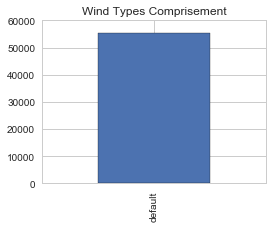

In [22]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH, integer_data)

## 1.5 Time Shift Comparison

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


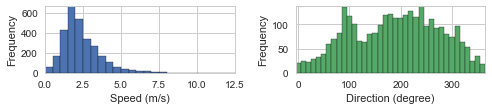

1981 - 1985


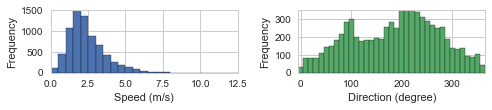

1986 - 1990


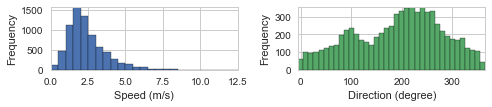

1991 - 1995


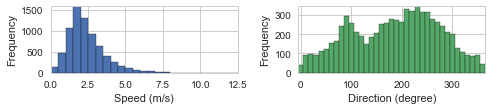

1996 - 2000


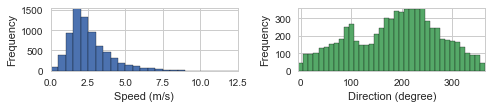

2001 - 2005


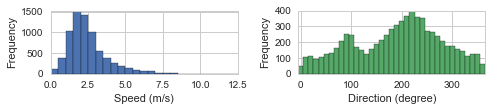

2006 - 2010


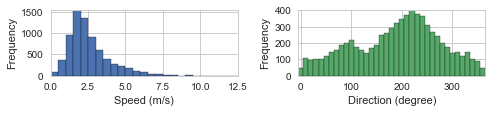

2011 - 2015


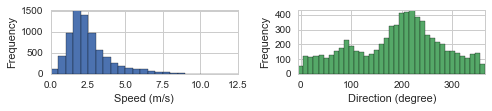

2016 - 2016


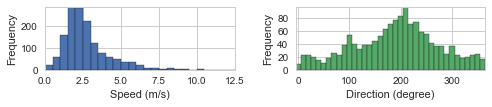

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text, bin_width=BIN_WIDTH)

(0, 5.0)

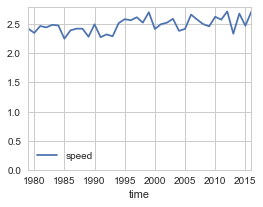

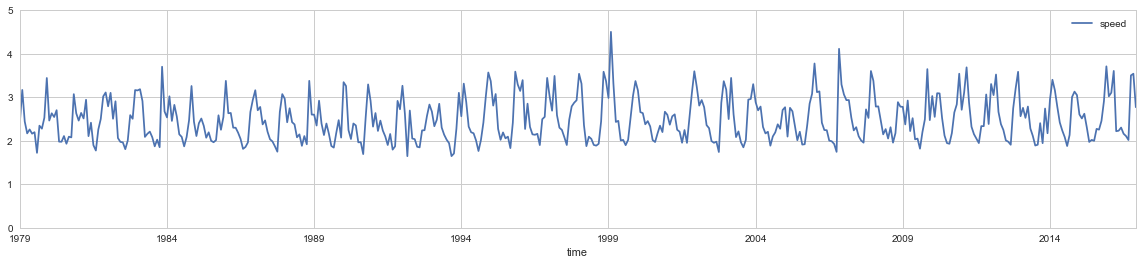

In [25]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
# %%time
# for column in ['speed', 'dir']:
#     if column == 'speed':
#         bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
#     else:
#         bins = arange(0, 361, 10)
#     den, _ = np.histogram(df[column], bins=bins, density=True)
#     y_top=max(den)*1.2
#     for year in arange(1980, 2016):
#         end_year = year
#         sub_df = df[str(year):str(end_year)]
#         if len(sub_df) > 1000:
#             plt.figure()
#             df[column].hist(bins=bins, alpha=0.3, normed=True)
#             sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
#             plt.gca().set_ylim(top=y_top)
#             plt_configure(title=str(year))
#     align_figures()

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGJ1JREFUeJzt3W1sW/XB/vGv8+CQ2k6zoFVC6zI1Xa21qkKblAJaGugL
Fphgq1AxtZE3BkX3oq5dApSUPiSgUkrEYnVhCqWsE5pDErIVqQzQJtFVCX1QhgwtammH5j8KpKW0
Tbtim+ahzvm/4K6HF+7Ex3Vih16fV/XPPx9fx4HLx+f4+FgMwzAQEZGEZaU7gIjIVKPiFBExScUp
ImKSilNExCQVp4iISSpOERGTEirOw4cP4/V6ATh27Bgejwev18uDDz7I2bNnAejs7OTuu+/G5XKx
d+9eAAYGBli9ejUej4eHHnqIc+fOAXDo0CHuueceVqxYwe9+97uJWC8RkYljjGPHjh3GnXfeadxz
zz2GYRjGfffdZ3zwwQeGYRhGe3u78fTTTxunT5827rzzTmNwcND4/PPPY//+wx/+YDQ3NxuGYRiv
v/66sXnzZsMwDOMnP/mJ0dvba4yMjBgrV640jh49Ol4MEZGMMe4WZ3FxMc8991zsts/nY+7cuQBE
o1Hy8vJ4//33WbhwIVarFYfDQXFxMcePHycQCLBkyRIAKisrOXjwIOFwmKGhIYqLi7FYLFRUVHDg
wIEJelsQEUm9nPEmVFVV0dfXF7s9Y8YMAN59911aW1t5+eWXefvtt3E4HLE5NpuNcDhMOByOjdts
NkKhEOFwGLvdHjf3k08+GTdoIBBIfK1EREwoLy83NX/c4vw6b775Js8//zw7duygqKgIu91OJBKJ
3R+JRHA4HHHjkUiEgoKCr51bUFCQ0POaXbnJFAgElO8KKN+VyeR8mZwNktsoM12cu3fv5pVXXsHv
91NYWAhAaWkp27ZtY3BwkKGhIYLBIE6nk7KyMrq6uigtLaW7u5vy8nLsdju5ubl8/PHHfPe732Xf
vn386le/Mh18MkSjUYLBYMJzReTqYKo4o9EoW7Zs4brrrmP16tUA3HDDDaxZswav14vH48EwDGpr
a8nLy8PtdlNXV4fb7SY3N5empiYAnnzySR599FGi0SgVFRVcf/31qV+zFAgGg3gfb2Pa9Bljzvvi
wmnq7itl8eLFk5RMRNIpoeKcOXMmnZ2dAPzjH//42jkulwuXyxU3lp+fT3Nz86i5CxYsiC0v002b
PgP7t76T7hgikkH0BXgREZNUnCIiJqk4RURMUnGKiJik4hQRMUnFKSJikopTRMQkFaeIiEkqThER
k1ScIiImqThFRExScYqImKTiFBExScUpImKSilNExCQVp4iISSpOERGTkrpYm8QzRkY4efIkH374
4bhzZ8+eTXZ29iSkEpGJouJMgYuhM/j3Wtj17ltjzvviwmn8Wz04nc5JSiYiEyGh4jx8+DC/+c1v
8Pv99Pb2sm7dOiwWC3PmzKGhoYGsrCw6Ozvp6OggJyeH6upqli5dysDAAGvXrqW/vx+bzUZjYyNF
RUUcOnSILVu2kJ2dTUVFRcZe5dIMXZtI5Oox7j7OF198kY0bNzI4OAjA1q1bqampoa2tDcMw2LNn
D2fOnMHv99PR0cHOnTvx+XwMDQ3R3t6O0+mkra2NZcuW0dLSAkBDQwNNTU20t7dz+PBhPvjgg4ld
SxGRFBq3OIuLi3nuuedit48ePRq7DG5lZSUHDhzg/fffZ+HChVitVhwOB8XFxRw/fpxAIMCSJUti
cw8ePEg4HGZoaIji4mIsFgsVFRUcOHBgglZPRCT1xv2oXlVVRV9fX+y2YRhYLBYAbDYboVCIcDiM
w+GIzbHZbITD4bjxr8612+1xcz/55JOEwgYCgcTWKkV6e3tTvswjR44QCoVSvtxETPbrZ5byXZlM
zpfJ2ZJh+uBQVtZ/NlIjkQgFBQXY7XYikUjcuMPhiBsfa25BQUFCz11eXm427hVxOBzw+qmULnP+
/PlpOTgUCAQm/fUzQ/muTCbny+RskFypm/4e57x58+jp6QGgu7ubRYsWUVpaSiAQYHBwkFAoRDAY
xOl0UlZWRldXV2xueXk5drud3NxcPv74YwzDYN++fSxatMh0cBGRdDG9xVlXV8emTZvw+XyUlJRQ
VVVFdnY2Xq8Xj8eDYRjU1taSl5eH2+2mrq4Ot9tNbm4uTU1NADz55JM8+uijRKNRKioquP7661O+
YiIiEyWh4pw5cyadnZ0AzJo1i9bW1lFzXC4XLpcrbiw/P5/m5uZRcxcsWBBbnojIVKNTLkVETFJx
ioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNUnCIiJqk4RURMUnGKiJik4hQRMUnFKSJikopT
RMQkFaeIiEkqThERk1ScIiImqThFRExScYqImKTiFBExScUpImKS6atcAgwPD7Nu3TpOnDhBVlYW
mzdvJicnh3Xr1mGxWJgzZw4NDQ1kZWXR2dlJR0cHOTk5VFdXs3TpUgYGBli7di39/f3YbDYaGxsp
KipK9bqJiEyIpLY4u7q6uHTpEh0dHaxatYpt27axdetWampqaGtrwzAM9uzZw5kzZ/D7/XR0dLBz
5058Ph9DQ0O0t7fjdDppa2tj2bJltLS0pHq9REQmTFJbnLNmzSIajTIyMkI4HCYnJ4dDhw6xePFi
ACorK9m/fz9ZWVksXLgQq9WK1WqluLiY48ePEwgEWLlyZWxuosUZCASSiZu03t7elC/zyJEjhEKh
lC83EZP9+pmlfFcmk/NlcrZkJFWc06ZN48SJE9xxxx2cP3+e7du3884772CxWACw2WyEQiHC4TAO
hyP2OJvNRjgcjhu/PDcR5eXlycRNmsPhgNdPpXSZ8+fPx+l0pnSZiQgEApP++pmhfFcmk/NlcjZI
rtSTKs6XXnqJiooKHnnkET799FN+/vOfMzw8HLs/EolQUFCA3W4nEonEjTscjrjxy3MnUzQaJRgM
jjvvo48+moQ0IjLVJFWcBQUF5ObmAjB9+nQuXbrEvHnz6Onp4cYbb6S7u5ubbrqJ0tJStm3bxuDg
IENDQwSDQZxOJ2VlZXR1dVFaWkp3d/ekvxsFg0G8j7cxbfqMMef19x3j2plzJymViEwVSRXn/fff
z/r16/F4PAwPD1NbW8v8+fPZtGkTPp+PkpISqqqqyM7Oxuv14vF4MAyD2tpa8vLycLvd1NXV4Xa7
yc3NpampKdXrNa5p02dg/9Z3xpzzxYXPJimNiEwlSRWnzWbjt7/97ajx1tbWUWMulwuXyxU3lp+f
T3NzczJPLSKSdvoCvIiISSpOERGTVJwiIiapOEVETFJxioiYpOIUETEpqa8jSXKMkZGEz0aaPXs2
2dnZE5xIRJKh4pxEF0NnqN9xlmnTxz7d84sLp/Fv9aTlnHYRGZ+Kc5IlcsaSiGQ27eMUETFJxSki
YpKKU0TEJBWniIhJKk4REZNUnCIiJqk4RURMUnGKiJik4hQRMUnFKSJiUtKnXL7wwgv8/e9/Z3h4
GLfbzeLFi1m3bh0Wi4U5c+bQ0NBAVlYWnZ2ddHR0kJOTQ3V1NUuXLmVgYIC1a9fS39+PzWajsbGR
oqKiVK6XiMiESWqLs6enh/fee4/29nb8fj+nTp1i69at1NTU0NbWhmEY7NmzhzNnzuD3++no6GDn
zp34fD6GhoZob2/H6XTS1tbGsmXLaGlpSfV6iYhMmKS2OPft24fT6WTVqlWEw2Eee+wxOjs7Wbx4
MQCVlZXs37+frKwsFi5ciNVqxWq1UlxczPHjxwkEAqxcuTI2N9HiDAQCycQdpbe3NyXLmUhHjhwh
FAqldJmpev0mivJdmUzOl8nZkpFUcZ4/f56TJ0+yfft2+vr6qK6uxjAMLBYL8OXlg0OhEOFwGIfD
EXuczWYjHA7

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGEBJREFUeJzt3XtsU/fdx/G3c3EabKeUoUroYaFAiRhEEQEEmzLS8qgQ
VJVBEVizkZEaQJB10KQDAoFwUSK6iIVtINKb2D+hkEYwVWhs6lpEiQSUP7yVKKEZmsUicVnLZR22
Cw6E8/wx4adZnOQk+Bo+r7+S3znO+Z5fnE+Oz/n9zrEYhmEgIiL9Skt0ASIiqUBhKSJigsJSRMQE
haWIiAkKSxERExSWIiImZAy0Qnd3N9u2bePy5ctYLBZ27dpFVlYWmzdvxmKxMGnSJHbs2EFaWhrN
zc00NTWRkZFBWVkZc+fO5d69e2zcuJFbt25hs9moq6tj1KhR8dg3EZGoGfDI8tSpUwA0NTVRXl7O
r3/9a9566y3Ky8s5fPgwhmFw8uRJbty4QWNjI01NTRw8eJC9e/fS1dXFkSNHyMvL4/DhwyxevJiG
hoaY75SISLQNeGT50ksv8eKLLwJw7do1cnJyOHv2LLNmzQKguLiYM2fOkJaWRmFhIVarFavVSm5u
Lh0dHXi9XlatWhVeV2EpIqlowLAEyMjIoLKykk8++YR9+/Zx5swZLBYLADabDb/fTyAQwOFwhF9j
s9kIBAI92h+tOxCv1zuUfRERGdCMGTOG9DpTYQlQV1fHhg0bcDqdhEKhcHswGCQnJwe73U4wGOzR
7nA4erQ/WteMoe5QtHm93qSoJVnqANXSF9USWbLVMlQDnrP86KOPePfddwHIzs7GYrGQn5/P+fPn
AWhpaWHmzJkUFBTg9XoJhUL4/X58Ph95eXlMnz6d06dPh9dNlk4TERmMAY8s58+fz5YtW1i+fDkP
HjygqqqKiRMnUl1dzd69e5kwYQIlJSWkp6fj8Xhwu90YhkFFRQVZWVm4XC4qKytxuVxkZmZSX18f
j/0SEYmqAcNyxIgR/Pa3v+3VfujQoV5tTqcTp9PZoy07O5t9+/Y9RokiIomnQekiIiYoLEVETFBY
ioiYYHrokEgq6e7uxufz9bl84sSJpKenx7EiSXUKSxmWfD4fni2HGfH0s72Wffvvr2l8y01eXl4C
KpNUpbCUYWvE089if+Z/erUbDx9y+fLlPl+no06JRGEpT5y7/htsf+8mI57u/TFdR53SF4WlPJH6
OuoU6YuuhouImKAjS0lZ3d3ddHZ29rjb1SP9nZMUGQqFpaQsn89H3QetjHj6n72W3bryJd8b+4ME
VCXDlcJSUlpf5x6//fdXCahGhjOdsxQRMUFhKSJigj6Gi3yHBqxLXxSWIt+hAevSF4WlyH/RgHWJ
ROcsRURMUFiKiJjQ78fw+/fvU1VVxdWrV+nq6qKsrIwxY8awZs0annvuOQBcLhcvv/wyzc3NNDU1
kZGRQVlZGXPnzuXevXts3LiRW7duYbPZqKurY9SoUfHYLxGRqOo3LI8fP87IkSPZs2cP33zzDYsX
L+b111/ntddeo7S0NLzejRs3aGxs5NixY4RCIdxuN0VFRRw5coS8vDzWrVvHiRMnaGhoYNu2bTHf
KRGRaOv3Y/iCBQt44403ADAMg/T0dNra2vjss89Yvnw5VVVVBAIBWltbKSwsxGq14nA4yM3NpaOj
A6/Xy5w5cwAoLi7m3Llzsd8jEZEY6PfI0mazARAIBFi/fj3l5eV0dXWxbNky8vPzefvttzlw4ACT
J0/ucTMDm81GIBAgEAiE2202G36/33RhXq93KPsTE8lSS7LUAclRS2dnZ9y32dbW1u/7OBn65RHV
El0DDh26fv06r7/+Om63m4ULF3Lnzh1ycnIAmDdvHjU1NcycOZNgMBh+TTAYxOFwYLfbw+3BYDD8
OjNmzJgx2H2JCa/XmxS1JEsdkDy1OBwO+EPvm2jEUn5+fp/jLJOlX0C19OVxQrvfj+E3b96ktLSU
jRs3snTpUgBWrlxJa2srAOfOnWPq1KkUFBTg9XoJhUL4/X58Ph95eXlMnz6d06dPA9DS0pI0HSYi
Mlj9Hlm+88473Llzh4aGBhoaGgDYvHkzu3fvJjMzk9GjR1NTU4Pdbsfj8eB2uzEMg4qKCrKysnC5
XFRWVuJyucjMzKS+vj4uOyUiEm39huW2bdsiXr1uamrq1eZ0OnE6nT3asrOz2bdv32OWKCKSeJru
KGLSQDfZ6O7ujmM1Em8KSxGTBrrJRuXyAmbNmpWAyiQeFJaS1Lq7u/H5eocTJOY5O7rJxpNLYSlJ
zefz4dlymBFPP9trmZ6zI/GksJSkp+fsSDLQXYdERExQWIqImKCwFBExQecsJeGS7Yq3SCQKS0k4
XfGWVKCwlLgY6OhRV7wl2SksJS509CipTmEpcTOcjx6Nhw+5du0aly5dirh84sSJpKenx7kqiSaF
pUgU3PXfoPGUhWN/+bTXsm///TWNb7n7vGmwpAaFpUiUaN748KZxliIiJigsRURMUFiKiJigsBQR
MUEXeJJEf4O2Hy0XkcTpNyzv379PVVUVV69epauri7KyMp5//nk2b96MxWJh0qRJ7Nixg7S0NJqb
m2lqaiIjI4OysjLmzp3LvXv32LhxI7du3cJms1FXV8eoUaPitW8ppb9B23pkgUji9RuWx48fZ+TI
kezZs4dvvvmGxYsXM3nyZMrLy5k9ezbbt2/n5MmTTJs2jcbGRo4dO0YoFMLtdlNUVMSRI0fIy8tj
3bp1nDhxgoaGhohPi5T/0NATkeTVb1guWLCAkpISAAzDID09nfb29vARTnFxMWfOnCEtLY3CwkKs
VitWq5Xc3Fw6Ojrwer2sWrUqvO6jZ4+b4fV6h7pPURePWjo7O5OiDrMGW4uZ/RvO2tra8Pv9cd1m
Kr9fklG/YWmz2QAIBAKsX7+e8vJy6urqsFgs4eV+v59AIIDD4ejxukAg0KP90bpmzZgxY9A7Ewte
rzcutTgcDvjDP/tdJ5X7xMz+DWf5+flxncETr/etGclWy1ANeDX8+vXrrFixgkWLFrFw4ULS0v7/
JcFgkJycHOx2O8FgsEe7w+Ho0f5oXRGRVNTvkeXNmzcpLS1l+/bt/OhHPwJgypQpnD9/ntmzZ9PS
0sIPf/hDCgoK+M1vfkMoFKKrqwufz0deXh7Tp0/n9OnTFBQU0NLSkjT/XUTiyXj4sN+bGOsmG6mh
37B85513uHPnDg0NDeHzjVu3bqW2tpa9e/cyYcIESkpKSE9Px+Px4Ha7MQyDiooKsrKycLlcVFZW
4nK5yMzMpL6+Pi47JZJM7vpvsP29m4x4uvfQMN1kI3X0G5bbtm2LePX60KFDvdqcTidOp7NHW3Z2
Nvv27XvMEkVSn0Y6pD7N4BERMUFhKSJigsJSRMQEhaWIiAkKSxERE3TXIYmagR53K5LKFJYSNXrc
rQxnCkuJquH8uNtY0Oye1KGwFEkgze5JHQpLkQTT7J7UoKvhIiImKCxFREzQx/A462t4jYbWiCQ3
hWWc9TW8RkNrRJKbwjIBIp3Q729ojfHwIdeuXePSpUsRl2t4iUjsKSxTwF3/DRpPWTj2l097LYv3
8JLu7m46Ozt7PHPpEZ1KkOFMYZkikmV4ic/no+6DVkY83fvhYzqVIMOZwlIGTbN05EmkoUMiIiaY
CssLFy7g8XgAuHjxInPmzMHj8eDxePjjH/8IQHNzM0uWLMHpdHLq1CkA7t27x7p163C73axevZrb
t2/HaDdERGJrwI/h77//PsePHyc7OxuA9vZ2XnvtNUpLS8Pr3Lhxg8bGRo4dO0YoFMLtdlNUVMSR
I0fIy8tj3bp1nDhxgoaGhogPQBOR3nSTjeQyYFjm5uayf/9+Nm3aBEBbWxuXL1/m5MmTjBs3jqqq
KlpbWyksLMR

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [28]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)
else: 
    speed_redistribution_info = 'None'

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
print('Speed redistribution info:', speed_redistribution_info )
print(len(df))

Knot unit? False
Report type used: default
Sampling time used: Default
Speed redistribution info: None
55520


In [33]:
df_all_years = df
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
elif 'portus' in file_path:
    df = df_all_years
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
# df = df.query('(HrMn%600 == 0)' )
df.describe()

lat           lon             x             y         speed  \
count  1.460800e+04  1.460800e+04  14608.000000  14608.000000  14608.000000   
mean   4.700000e+01  2.370000e+02     -0.955729     -0.424413      2.562621   
std    4.703954e-12  9.172000e-11      2.067680      1.802065      1.431391   
min    4.700000e+01  2.370000e+02    -10.918585     -9.166093      0.010145   
25%    4.700000e+01  2.370000e+02     -2.149330     -1.656267      1.633600   
50%    4.700000e+01  2.370000e+02     -0.742086     -0.585217      2.216330   
75%    4.700000e+01  2.370000e+02      0.491738      0.983090      3.116656   
max    4.700000e+01  2.370000e+02      4.432800      6.275871     11.387119   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     190.187829  2.010567e+07    900.000000    190.187829  
std       86.668069  2.872210e+04    670.843355     86.668069  
min        0.002385  2.006010e+07      0.000000      0.002385  
25%      125.253343  2.008070e+07    450.000000    125.253343  
50%      201.846276  2.010567e+07    900.000000    201.846276  
75%      249.810863  2.013070e+07   1350.000000    249.810863  
max      359.994014  2.015123e+07   1800.000000    359.994014

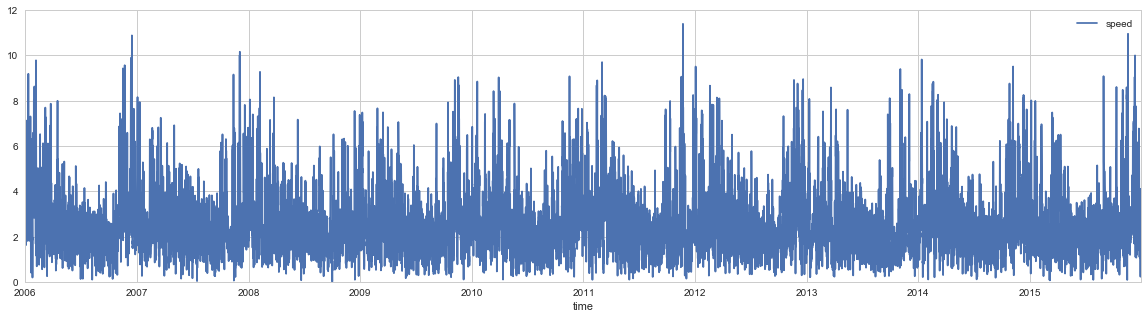

In [34]:
df.plot(y='speed',legend=True,figsize=(20,5))

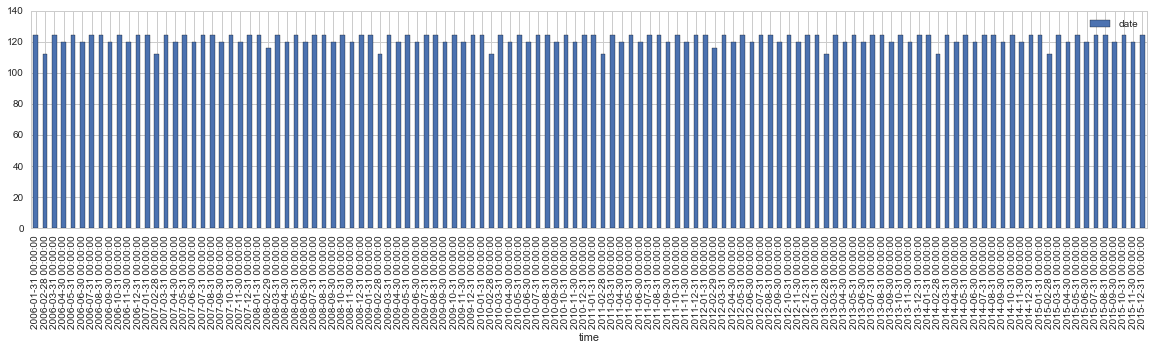

In [35]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


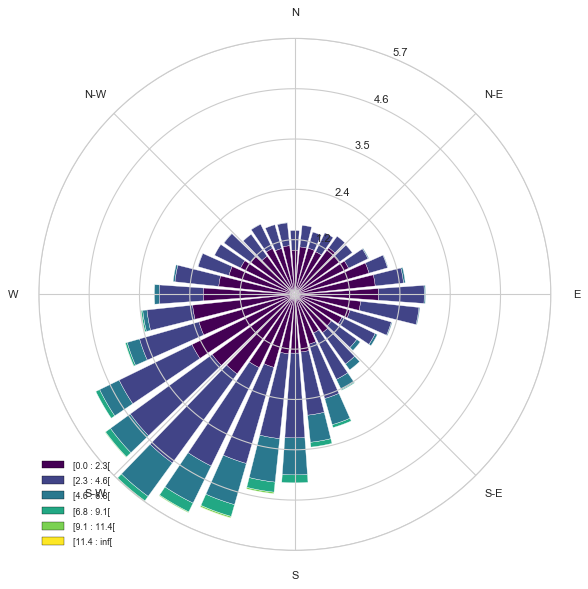

In [36]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [37]:
if len(df) > 300000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=300000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [38]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX+x/EXMyOyC26kJu64ZSLgLmoSaZpabpCGea1r
lrfSzPC6YJfrgrtlLlnea2Gm16UUM1xLStMAw9xNMXNHQYQZBISZ3x/G/CRlAJ3hzAyf5+PBI4Zz
5ns+YLw553u+5/t1MBgMBoQQwoxUShcghLA/EixCCLOTYBFCmJ0EixDC7CRYhBBmJ8EihDA7jdIF
lFZSUpLSJQhRYQUEBJRpf5sJFij7N2dpSUlJVlcTWGddUlPpWGtNZSWXQkIIs5NgEUKYnQSLEMLs
JFiEEGYnwSKEMDsJFiGE2UmwCCHMToJFCAW9/PLL/PrrrwDk5eXxyiuv8Omnnxq3h4eHc+LEifve
Fx8fz7p167h48SJDhgwp9fE6d+5sbPfs2bOPWH3xbGqAXHnR6/XcvHmzVPsJ8Sg6d+5MYmIiTz75
JElJSTz55JPs3buXV199ldzcXC5dukSzZs3ue1/Xrl0BuHjxYnmXXCoSLA9w8+ZNPtuSiKubR7H7
6LSZtPaRH589mTBhAuvXrzdrm4MHD2bu3LnFbu/UqRNLly5l5MiR7N27l6eeeorNmzeTlZXFsWPH
aNeuHQkJCSxcuBC1Wk3dunWJiooiNjaWlJQUwsLCSE9PZ/To0aSlpdG9e3fGjBnDxIkT6d27N127
diU+Pp5t27YRHR1t1u/NFPnNKIarmwfuHl4l7JVdLrUI+9WiRQtSUlIwGAwkJCQwYcIEUlNT2b9/
P6dOnaJLly5MnTqVNWvWUK1aNRYtWsRXX32FRvP/v7rZ2dnMnTsXFxcXhg0bRnBwsILf0V0SLEL8
ae7cuSbPLixBpVLRrFkz4uPjqVGjBpUqVaJr1658//33nDx5kmHDhjF16lTGjh0LQE5ODp06daJe
vXrGNpo1a4a7uzsArVq14ty5c0WOocS01tJ5K4TCOnfuzMcff0xQUBBw92Hb48ePo9fr8fLy4rHH
HmPp0qXExMQwevRoOnToUOT9Z8+eRafTkZ+fz6+//kqTJk1wdHTk+vXrABw/frzcvyeLBYterycy
MpLQ0FDCw8M5f/78A/ebOnUq8+bNs1QZQli9Tp06kZSURLdu3QBwdHTE3d2ddu3aoVKpmDx5MqNG
jSIsLIw1a9bg6+tb5P1VqlRh3LhxhIWF0bNnTxo3bszgwYNZtWoVI0aM4Nq1a+X+PVnsUmjXrl3k
5eWxbt06kpOTiY6OZtmyZUX2Wbt2LadPn6Zt27aWKkMIq1enTh1OnToFYAyBpUuXGrd36dKFLl26
FHnPgAEDjJ9v2bLlvjZbtWpFbGzsfV/ft28fADExMY9euAkWO2NJSkoyntr5+flx9OjRItsPHTrE
4cOHCQ0NtVQJQgiFWOyMRavV4ubmZnytVqvJz89Ho9GQmprKkiVL+Oijj/j2229L3WZ5zSKXkZHB
1auZZGlvF7uPTnuLxlU9rHZmO2usS2oqHWusqawsFixubm7odDrja71eb7xFFhcXx82bNxk1ahTX
r18nJyeHhg0bFjm9e5DymlkrLS2NM+mnTd5uzsp0BrKtbrYvsN5ZyKSmkllrTWVlsWDx9/fnu+++
o3fv3iQnJxfpcBo+fDjDhw8HYNOmTaSkpJQYKkII22GxYAkJCWHfvn2EhYVhMBiYOXMmsbGxZGdn
S7+KEHbOYsGiUqmIiooq8rVGjRrdt5+cqQhrUdpnxMrCy8sLlariDReTkbdC/Kk0z4iVhU6bycv9
AqlWrVqx+xw8eJCxY8fSuHFjDAYDGRkZvPHGG/Tu3fuB+1++fJmTJ0/So0cPs9RoKRIsQtyjdM+I
mVeHDh1YuHAhcHecyfz582nQoAHNmze/b98DBw6QkpIiwWKv9Ho9t27dIi0trcR9K+rpsCg7Jycn
QkND2bZtG6tXr+bq1aukpqbSo0cP3nrrLVasWEFOTg5t2rTB3d2djz76CIPBgE6nMwaSNZBgeUjZ
uix+uJDO9YLTJvcrzemwEPeqVq0aO3bsoFevXgwePJjc3Fy6du3KuHHjGDVqFCkpKQQHB/PFF18w
d+5cvL29Wb58OXFxcbz++utKlw9IsDwSZxe3cj9tFvbv8uXLtGnThiNHjnDgwAHc3NzIy8u7bz9v
b29mzJiBi4sL165dw9/fX4FqH0zOz4WwItnZ2axfvx53d3fc3d2ZP38+I0eOJCcnB4PBgEqlMs5c
OHXqVGbOnEl0dDQ1a9ZUZHqE4sgZixD30Gkzy72tAwcOEB4ejkqlIiMjgzfffJMGDRowfvx4kpOT
cXR0pF69eqSmpuLr68uyZcto2bIl/fr1Y9iwYTg7O1O9enVSU1PNVvujkmAR4k9eXl683C/Q7G2a
0r59e3766Sfj63uH9D/oqWVvb2+2b98OQJ8+fcxYqXlJsAjxJ5VKJZ3sZiJ9LEIIs5NgEUKYnQSL
EMLsJFiEEGYnwSKEMDsJFiGE2UmwCCHMToJFCGF2EixCCLOTYBFCmJ0EixDC7CRYhBBmJ8EihDA7
CRYhhNlJsAghzE6CRQhhdhIsQgizk2ARQpidBIsQwuwsFix6vZ7IyEhCQ0MJDw/n/PnzRbZv376d
gQMHMmjQID777DNLlSGEUIDFgmXXrl3k5eWxbt06xo8fT3R0tHFbQUEB8+fPZ9WqVaxbt441a9aQ
np5uqVKEEOXMYrP0JyUlERQUBICfnx9Hjx41blOr1Wzbtg2NRkNaWhp6vR5HR0dLlSKEKGcWCxat
Voubm5vxtVqtJj8/H43m7iE1Gg07duwgKiqKbt264ezsXGKbSUlJliq3iIyMDK5ezSRLe7vYfa6n
pqJWO3L58mWTbem0t0hOzsbT09PcZZpUXj+rspCaSscaayoriwWLm5sbOp3O+Fqv1xtDpdAzzzzD
008/zcSJE/n6668ZOHCgyTYLF3KytLS0NM6knza5LrODIY+0tAxq165tsq2sTGf8/HzLdb2aexe9
shZSU+lYa01lZbE+Fn9/f+Lj4wFITk7G19fXuE2r1fLSSy+Rl5eHSqXC2dkZlUpuUAlhLyx2xhIS
EsK+ffsICwvDYDAwc+ZMYmNjyc7OJjQ0lL59+zJs2DA0Gg1NmzalX79+lipFCFHOLBYsKpWKqKio
Il9r1KiR8fPQ0FBCQ0MtdXizy9ZlsTFmMTUeq0tAxx5KlyOEVZO1m0vBYDCwYsFkEvbtBCBm+Uxq
121Iw6ZtcHNxpF6j5jg4OChcpRDWQ4KlFLZtWkXCvp00b9WWjt37kPjTbo4l/8TlCyn8uGsj1WrW
IqBDMIGdgmn6RAAaTSWlSxZCURIsJTh5NJG1K+fj6VWdf/xzPp5VaxDcJ5RzZ46R+FM8qZdTSP55
Lzu2rGbHltW4uHnQpm03AjoF49/+KaXLF0IREiwmZKRfZ/HMdwD4x6QFeFatYdzm5OxK89YdGRz+
Ovl38jh5JJGkA3tI3L+bfd/Fsu+7WFr5d+b192YrVb4QipF7vMUoKMjno+h3yUi/TujfxtG8Vdti
99VUcuQJ/068/MYUPozZw/TFG2jp14Ejh/axM3ZNOVYthHWQYCnGlnWfcOLXnwnsFEyfQSNL/T4H
BwcaNGnJPybevXzavPZjfvnlFwtWKoT1qXDBotfrSUtLM/mxfv16tn8dg3ctH0a9M/Oh7vh4eFZl
9IRo9AUFjBo1iqysLAt8N0JYpwrXx3Lz5k0+25KIq5vHA7dfv3aJGe+Np1IlR96e+kGx+5VGK//O
hPQbxs4tX/DWW2/x3//+96HbEsKWVLgzFgBXNw/cPbzu+6js5MLKRZHk3M5m4PC3qdew2SMfq3/Y
KFq3bs2qVat

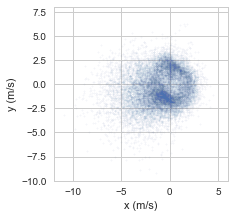

In [39]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [40]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [41]:
# %%time
# original_incre, incre = SECTOR_LENGTH, rebinned_angle
# start, end = -original_incre/2 + incre/2, 360

# max_speed = df.speed.max()
# max_count = max_count_for_angles(df, start, end, incre)
# plot_range = [0, max_speed, 0, max_count*1.05]

# for angle in arange(start, end, incre):
#     start_angle, end_angle = angle-incre/2, angle+incre/2
#     sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
#     fig = plt.figure()
#     sub_df['speed'].hist(bins=arange(0, max_speed+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data')
#     plt.axis(plot_range)
#     plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) )
# align_figures()

## 2.3 Overview by Month

In [42]:
# %%time
# current_df = df.query('speed>=1')
# for month in arange(1, 13): 
#     sub_df = current_df[current_df.index.month == month]
#     ax = WindroseAxes.from_ax()
#     ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
#     plt_configure(figsize=(3,3), title='Month: %s'%(month))
# align_figures()

In [43]:
df.describe()

lat           lon             x             y         speed  \
count  1.460800e+04  1.460800e+04  14608.000000  14608.000000  14608.000000   
mean   4.700000e+01  2.370000e+02     -0.955729     -0.424413      2.562621   
std    4.703954e-12  9.172000e-11      2.067680      1.802065      1.431391   
min    4.700000e+01  2.370000e+02    -10.918585     -9.166093      0.010145   
25%    4.700000e+01  2.370000e+02     -2.149330     -1.656267      1.633600   
50%    4.700000e+01  2.370000e+02     -0.742086     -0.585217      2.216330   
75%    4.700000e+01  2.370000e+02      0.491738      0.983090      3.116656   
max    4.700000e+01  2.370000e+02      4.432800      6.275871     11.387119   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     190.187829  2.010567e+07    900.000000    190.187829  
std       86.668069  2.872210e+04    670.843355     86.668069  
min        0.002385  2.006010e+07      0.000000      0.002385  
25%      125.253343  2.008070e+07    450.000000    125.253343  
50%      201.846276  2.010567e+07    900.000000    201.846276  
75%      249.810863  2.013070e+07   1350.000000    249.810863  
max      359.994014  2.015123e+07   1800.000000    359.994014

# 3. Create input data and configuration

In [44]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
# FIT_METHOD = 'chi_square'
# FIT_METHOD = 'k_s'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [45]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+BIN_WIDTH, BIN_WIDTH)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+BIN_WIDTH, BIN_WIDTH)

[-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.
  1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6. ]


# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [47]:
%%time
if 'bandwidth' not in globals():
    from sklearn.model_selection import GridSearchCV  

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.3,1.2,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=40000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel=KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4, return_train_score=False) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    plt.plot(bandwidth_range, grid.cv_results_['mean_test_score'], label='test')
    plt.fill_between(bandwidth_range,
                     grid.cv_results_['mean_test_score']+grid.cv_results_['std_test_score'], 
                     grid.cv_results_['mean_test_score']-grid.cv_results_['std_test_score'], alpha=0.2)
    plt_configure(figsize=(4,3))
    
print(bandwidth)

0.4
Wall time: 1e+03 µs


In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [49]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.4 625
[ 0.00034972  0.0004143   0.00055395  0.00075579  0.00102974]


In [50]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYK2d9JvqWdrV6X07v+7GBMQRsQwKXcAkGAnhwvB0w
JvHkASdkGBMCGfZhPA6YLQl4iMHYEAwZz7AFckkY7jiBx1yWJOPYgJNgewynd7Va+76rlvuHzlf9
ValKqlWt6lPv8/Rz+rT01VeSql69v50RBEGACxcuXJxSeE76BFy4cOHCTrgk58KFi1MNl+RcuHBx
quGSnAsXLk41XJJz4cLFqYZLci5cuDjVcEnOhQsXpxouyblw4eJUwyU5Fy5cnGq4JOfChYtTDZfk
XLhwcarhkpwLFy5ONVySc+HCxamGS3IuXLg41XBJzoULF6caLsm5cOHiVMMlORcuXJxquCTnwoWL
Uw2X5Fy4cHGq4ZKcCxcuTjVcknPhwsWphktyLly4ONVwSc6FCxenGi7JuXDh4lTDJTkXLlycavhO
+gRcnDwEQUCz2QTLsvB6vfD7/fB4PGAY5qRPzYUL02AEQRBO+iRcnBwajQYKhQJGRkbQarUAALFY
DBMTExgZGYHH43FJz4Wj4Sq5ixgcx6FWqyGVSiESiYBlWfj9fgiCAEEQwHEcWJZFs9kEwzDwer0u
6blwHFySuwghCAJYlgXHcWAYBhzHYWtrCxzHwefzged5VKtVBINB+HzHlwghvUajAY/HA6/XC6/X
C5/P55Kei4GFa65eZOB5Hq1WC+RjPzo6QjabxcrKCgKBAJrNJuLxOBiGQavVgs/nw9DQEMLhMIaG
huD1eiXHI8dhGEYkO5/P1/E8Fy5OCq6Su0hAzE+O4wAALMsiGo2C53n4/X6MjIyg2WwiFArB7/dj
bGwMkUgEjUYD1WoVhUIBiURCJD1CfDSZsSwLQRDQaDRc0nMxMHBJ7iIAz/NgWRY8z4NhGJRKJRwe
HmJychKjo6PY39+XPJ9hGAiCAIZhEAqFEAqFMDk5CUEQUK/XUavVkM/nEY/H4ff7RcLrRnoeTztb
qdVqYXR01CU9F32DS3KnHMSPRoIJ8XgcxWIRy8vLolLT6rFgGEYkM5r0qtUq8vk8jo6OEAgEJOYt
ITdBEFCr1ZBMJsUABvnXVXou7IRLcqcUcvO02Wzi4OAAgUAAm5ubYkDBTLCAJj2grRiJ0svlcjg6
OkIwGBQJj6whSlGu9FzSc2EHXJI7hZCbp7lcDvF4HGfOnMHk5GQHscmVHCEhvfB4PKK/bmpqSiS9
arWKbDaLer0OAEin0yI50krPJT0XdsAluVMG2jzleR5HR0eo1WpYX19HKBTqeL6daR806QFApVJB
MpkEAGQyGTQaDYRCIVHphUIhl/RcWA6X5E4JBEFAIpHA0NAQgsEg6vU6Dg4OEIlEsLm5KZKH2lrA
XsID2qTn8XgwPT0NoK04a7UaqtUq0um0SHrEp6eV9AKBgJuj50IVLsmdApDct1wuB5/Ph1KphFQq
hYWFBYyNjXVdq0QORs3VXpDv5fF4EIlEEIlEABxXYJAqjGazKZq1ROmRY8hJr9lsguM4TExMwO/3
u6TnQoRLcg4HqVwgIObg5uYmAoGApmMMSj641+vF8PAwhoeHARyTXrVaRTKZRKvV6lB6hMxIwCMc
DqNer0sqMlzSu7jhkpxDIS/NKpfLqNVqGBkZwfLysuabWu15g0B83UgvkUiAZVmR9AjRy5Veq9Vy
Se8ih0tyDgQdXACARCKBXC6HUCiE8fFx0zfwoBKAnPRYlhVJr1wuiykzROkFg0GX9Fy4JOckyHPf
Wq0WotEoGIbB5uYmYrGY7mPa5X/rB3w+H0ZGRjAyMoJgMIharYbh4WExOZnjONGfNzQ0JAlQ0KRH
AhmE+FzSO11wSc4hkOe+FYtFHB4eYnp6GtPT05IkWyvgROLzeDwi6QFtpVetVsUyNFrlyUmP53kx
gEOTns/ng8/nc0nPwXBJzgHgOE5saCkIAo6OjlAqlbC6uirmoAHGVBldp0r/zWlQet0+nw+jo6MY
HR0F0Fa+xLzN5/PgeV6i9GgFR5Neq9VCqVTC7OysS3oOhEtyAwx5cIHkvoVCIZw9e9ZNiJWhF/H4
/X74/X4J6RGll81mIQiCROkR0iOKkJi3DMO4Ss9BcEluQEGbpwCQzWaRSCQwOzuLiYkJy/LbaB+V
meM4EaSl1NjYGARBkCi9bDYLAAiHw2IjUVrx0krPJb3BhktyA4hcLgev14tgMAie5xGLxVCv11VL
swguFnKyAwzDIBAIIBAISEivWq2iVCqh0WhgZ2dHUekBLukNMlySGyAQ8zSdTmN0dBQcx+Hg4AAj
IyM9S7PM4DSQo9XnT5Oe3+9HNpvF7OwsqtUqKpUK0uk0PB6PSHjhcFiV9ABI5mN4vV6X9PoIl+QG
BHTuG4meVioVTaVZBFaRlVNJzy7iEARBrJENBAIYHx8XxziSHD3SJ48OZNAKziW9k4NLcicMee4b
x3GoVCrweDy6SrMA4+TkVFI7STAMg2AwiGAwiImJCQnplUolkfToVvFqpJdKpTA+Po5IJCJ2WHFJ
zzq4JHeCUGtL7vP5MD4+rovgXNgHeYqNEpRIr9FooFaroVgsivMxaPOWkF69Xhcjt81mEwA65mO4
pGccLsmdEOSlWfF4HPl8HktLSygWi4YuajOKLJ1Oo1gsIhQKiaMJXbRhVB2T+Rg06SkNBaKj6ORz
J+pePvPWJT39cK/kPkOe+9ZqtXBwcACfz4ezZ8+KrZL6ZXaSG6xUKuHMmTOSWtBarSYxt6wIfNhl
FmtRW2ZgRT2w2lAgjuPE+Ri00qPJzCU943BJro+Qm6eFQgGxWAwzMzOYmpoSL1QzikzPumq1ioOD
AzAMg5WVFXFmA+kqTOpASevyYDAokh7d0FIrnHoj2kGg9HyMYrGIubk5CIKgOhTIJT3jcEmuT6D7
vgmCgFgshkqlgrW1NXEQDIHdAQRBEJDJZJBKpbC4uIhYLKZY1kVuLjKvgag8uqElIT2644cLfaCj
t1qHAhFl7ZJeb7gkZzPUSrPC4TA2NzcVS7PMkBzx7aiBZVkcHh6CZVkxehuLxXqqFbUuvtVqFfF4
HCzLqnb86AfsjA7bbQorHV/LUCCirOmhQDTpsSyLZrOJWCyGxcVF+P3+i5L0XJKzEXRhPdAe3pJM
JjE3N4eJiQnVdVrISm1dt5udmKejo6NYXl4WzU0jF7xSb7dqtYpqtYpcLifWgdLF73bDqTeuFhKV
DwWiSa/XUCDi9yNpLrTS8/v9EnI8jXBJzgaQ3LfHH38cZ8+eBQDEYjE0m01sbGwgGAx2XW913prc
PCUF6vLnmPEJ0h0/6JIoMqTG4/EgGAyKCsNJ0duTUHK9oER6SkOBwuFwR+QWkCq90056zrnSHAJ5
YX2lUkE8Hsfo6CiWlpY0Oeut9MlxHIdoNCoxT5XWWQm6JIquDiBVHLu7u2L6BB1JdGEccncCTXoA
sL29LbaKlw8FApRJz+v1ivl6TiY9l+QshDz3jRTXq6mnbrCC5Ih5SuY+aBlLaGb/bucVDAYxOjqK
SqWC1dVV0dQikUSzkVs7MYhKrhcI6YXDYeTzeWxsbIiT0JLJZNdJaMDxtSxvFe9E0nNJzgIQ85Rl
WbH/WDQahSAIWFlZEf1WWmHWXBUEAdlsFslk0tBYQrsvYDp9ApD6l+TzV5VuQCWQCKUTYSeJkmPr
GQpET0KTBzIajQYYhumoyBhkuCRnEmqlWZOTk2BZ1tAFYPSCJwGLg4MDzf6/QYDcv6R0A5505NZO
EgLsbS6gdGwl0iMNROn3nLzv8hQheuZtNpvF+Pg4wuGwSJaDRHwuyZmAPPctHo+jWCxieXkZkUik
r5ULANBsNlE

## 4.1 Bootstrap GOF limit

In [51]:
# %%time
# gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
#                                        for i in arange(20)) 

In [52]:
# for gof_name in [ 'R_square', 'K_S','Chi_square']:
#     plt.figure(figsize=(4,3))
#     pd.DataFrame(gof_kde)[gof_name].hist()
#     plt_configure(title=gof_name)
# align_figures()

## 4.2 Bivariate Empirical Limit

In [53]:
# fig1, ax1 = plt.subplots(figsize=(3,2.5))
# fig2, ax2 = plt.subplots(figsize=(3,2.5))
# gofs_mean_set_bivar, gofs_bivar_set=[], {}

# # for year_length, line_style in zip([5, 7, 10], ['-.','--', '-']):
# for year_length, line_style in zip([5, 10], ['-.','-']):
#     # 1. Set time
#     start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
#     # 2. Obtain gofs_bivar
#     df_standard = df_all_years[str(2015-year_length+1):'2015']
#     kde_result_standard, _ = fit_kde(df_standard, config)
#     gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
#                                    for start_year in arange(start_year, end_year+1)) 
#     gofs_bivar_set[year_length] = gofs_bivar = pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
#     # 3. Make plot
#     if len(gofs_bivar)>0:
#         gofs_bivar.plot(y='R_square', ax=ax1, label=str(year_length)+' years', style=line_style)
#         gofs_bivar.plot(y='K_S', ax=ax2, label=str(year_length)+' years', style=line_style)
#     # 4. Obtain gofs averaged over late 5 years
#         year_lim = end_year-year_length-5, end_year-year_length
#         gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
#         gofs_mean['year_lim']=year_lim
#         gofs_mean_set_bivar.append(gofs_mean)
    
# plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='Start year')
# plt_configure(ax=ax2, ylabel='K-S', xlabel='Start year')
# align_figures()
# if len(gofs_mean_set_bivar)>0:
#     gofs_mean_set_bivar = pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')
#     display(gofs_mean_set_bivar)

## 4.3 Univariate GOF Limit

In [54]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.7,2.4))
fig2, ax2 = plt.subplots(figsize=(2.7,2.4))
fig3, ax3 = plt.subplots(figsize=(2.7,2.4))
gofs_mean_set, gofs_univar_set = [], {}

for year_length, line_style in zip([5, 7, 10], ['-.', '--','-']):
    # 1. Set time
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [univar_gof(df_all_years[str(start_year):str(start_year+year_length-1)], density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    # 3. Make plot
    if len(gofs)>0:
        gofs_univar_set[year_length]=gofs = pd.DataFrame(gofs, index=arange(start_year, end_year+1))
        ax1.plot(gofs.r_square, line_style, label=str(year_length)+' years')
        ax2.plot(gofs.k_s, line_style, label=str(year_length)+' years')
        ax3.plot(gofs.r_square_dir, line_style, label=str(year_length)+' years')
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
for ax, ylabel in zip([ax1, ax2, ax3], ['$\ R^2$','K-S', '$\ R^2$']):
    plt_configure(ax=ax, xlabel='Start year', ylabel=ylabel, tight='xtight', legend=True)
align_figures()
if len(gofs_mean_set)>0:
    gofs_mean_set_df = pd.DataFrame(gofs_mean_set).set_index('year_lim')
    display(gofs_mean_set_df)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOAAAACyCAYAAABba8MdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnWdgFOXahq8t2fRKSAVSqYEACRAQKSIQQIr0ZkTEwqdw
RFEBDwqKIjY8gAjqEVFRaXoQFAEpinQIJKSQ3kghhfS+Zb4fSxZC2iakwly/kpl3Zp7Z7J23PUUi
CIKAiIhIiyBtaQNERB5kRAGKiLQgogBFRFoQUYAiIi2IKEARkRZEFKCISAvSYgIMDg4mICCgyvHj
x48zdepUZs6cye7duwHQaDS89dZbzJw5k4CAABITEwFITExk9uzZzJkzh1WrVqHRaJr1HURE7hmh
Bfjyyy+F8ePHC9OnT690vLy8XBg5cqSQm5srlJWVCVOmTBEyMzOFw4cPC8uWLRMEQRCuXLkiLFy4
UBAEQXj++eeFc+fOCYIgCG+++aZw5MiR5n0REZF7pEV6wE6dOrFp06Yqx2NjY+nUqROWlpYoFAp8
fX25ePEigYGBDBkyBIA+ffoQGhoKQFhYGAMGDABg6NChnDlzpvleQkSkEZC3xEP9/f1JTk6ucryw
sBBzc3Pd76amphQWFlJYWIiZmZnuuEwmQ6VSIQgCEolE17agoKDOZwcGBjbCG4iIVI+vr2+92reI
AGvCzMyMoqIi3e9FRUWYm5tXOa7RaJDL5Uil0kptLSws9HrO3R9SYGBgvT+41kJL2q4uK6MwOgZF
OxuMHR3rfX11thcnXSfz75NknvyHsozM6i+USLDo3o12Dw2i3aCBGNq2Q5mfT/qfx7jxxyHKMrMA
kFtYYObpgZmHO2YeHlh4dcegju9Idkkuu0IO8Ff8WQQEpns9xvSe42u1ffnmUyjkUib1M6z3Z9Cq
BOjh4UFiYiK5ubmYmJhw6dIlFixYgEQi4cSJE4wbN46goCC6dOkCQI8ePTh//jx+fn6cPHmSgQMH
tvAb3B+U3bxJ2m8HyQ2+imG7dhg7O2Hk5ISxsyOaciX5oWHkhYWRHxWNRK1d+DJycsTa1xebfj5Y
ePVAamBQr2eWZmQQ+eF6CqOjAZAaGdH+keHY9PdFUKtRFRWhLipGVVhIQWQU+dciyA+/Rvx/t2Hq
5kZxcjKCUonUyAiHsf44jPHHxKWTboSkDwk5ybx5/GPKVGV0tHQioPcUejv0qPWauJQ8wuJu4tPV
rl7vW0GrEOCBAwcoLi5m5syZLF++nAULFiAIAlOnTsXe3p5Ro0Zx+vRpZs2ahSAIrF27FoBly5bx
5ptvsn79etzd3fH392/hN2nbFCUmkbrvVzJPnkJQqZDIZBTFxlXbVpBISLeWkdreEIsiNe4ZmZQe
+I20A78hVSgwcnLEyMEBIwd7jBwcMO/SGTMP92rvpSoqIvyd9yi5noy1r49WeAP6ITOsuUcpz87h
5rnz3Dx7jrzQMIwc7HEcNwa7Rx5BbmZaaXqiL3/GnqRMVcZTfaczxnN4pRFWTfx2Svv5PPawG5Sk
1Ot5ABJBeLCiIaob9jzoQ9CSlFTit20n55J2fmzs7ITT45OwGz4UdUkJJalplKSkkJeYSLGqFJd+
AzHq7M6umCMMdxvEh6e2klNwk1fsx2KbkE1eSBglaWloSksrPafT3Nl0mD5VJ4zAwED69u7NtTVr
yQ0KxnHCY7g/83Sla/QRkqa8HIlcjuSWYPaG/c7vkcd49eGFeNl10ftz0Gg0XE2PoI9j7b1ehe2d
u/Vi/juHsbE0YuvykQRdudy254AizYtGpSJ1336Sdu5GUCqx6NEdp8cnYdPfV/dllioUGFhaYtLF
k4//XEexsoT1vXtiKFfwlM8MAF5/+P/45dofePUfjcmjxgBEX89hx94LlKTdQJ6TxZCcYJJ++ImS
1DQ8X1yI1MAAQRCI++IrcoOCse7fD7f586rYeCIwmQthN3h+Si+szY2qfQ+pQoFG0KBWq5DL5DiY
tadIWcJ/A3/iI/+VyKWyWj8HQRAoVZVhbGCkl/gq+PN8IuUqDY8NdkMmrV9vW4EowAeUgugYYjdv
oSg+AQNrK9yfe4Z2gwbW2NvsizhCYl4KD7sMQHbXF9rVugOvPPQsSpWGGzn5mBhLkMukXEkpxdbK
ESPbjnyb4szC0nNknviLsvR0uq14HfXZ86QfPY6puxtdly5BIrt93+JSJSZGBpwOTuVC+A2CYzJ5
cqInY/p1RiKREJedSLGyBLnUgFJVKbtCD+Bt353Z3pN42GUAoRlRHI87zZGYvxnXZUStn0Vgagif
X/iOFwYE0M+5t16fn0YjcPBMPIYKGSMHuOh1TXWIAnwASdq5m+u79oBGg93IR3Gb/yTyO7Z57iY5
P41fwv/A2tiSZ3xm1dijbNhzgUtlv9LR3pw5fR5n0xv9cbRsT0mJhqfeOcLPDuN40SOEm6fPELRk
Kaqb2Sja2dB95QpkxsZkFN3EzrQd/1xJYctfv9O3jwEGnUtwsEoltzyHr8ONuHR1Bi9M8+bHq79y
Nf1aped3sHDUDVln9pzIueuX2RP6Gw+7DMDCsPr30wgadobsp0hZjIOZ/gspUamlZOSUMGaQK2bG
9VtwuhNRgA8Ymf+c5vpPuzC0s8Nz8QtYefeqtb1G0PDFhR2oNCqe8Z2NicK4xrbD+7gSccmGxPw4
3j9529EioPdUBvVy5J+gFIQX59HB2Ynk3XtBoaDHm//GsF07/oo/y/dBP/P15I+xMjcE8wwuZmgX
NUwMjOlk6URulgEXwtOI+U8Os2b40NXWHaVGhUbQ4OPYkx635nt/nInny32hjJ/8CKfSTpCUm0JP
+67V2nw68RJJeSkMcx1IB0v9t1LORxYCMH6wm97XVIcowAeI0vR0Yj/fitTICK/Vb2Ls7FTnNSXK
Ugzlhgzs4EP/GoZnqZmFOLU3o193B7Z0eZmLKcGkFtwgo+gmWUXZOJi3p6OfI/+EJHDkYiIvzZ2N
Za+eRCcnY+rmSlx2El9d+hGZVEaZqpxenrZ8YLsAAQ3WxpaYKUyRSCQIgsAuxyh+OBTB8T9NWPvC
OAzklVcqQ2Ky2Pq/EDQagZx4JzZMfafG3k+lUbM79AAyqazavb6ayCssI+VmOd6etrg46rf3XBOi
AB8QNCoVUZ/8B3VxMZ7/elEv8QGYKkz497DFlKuV1Z4/fuk6G3ZeZvGMvowc0AkDmZyHOlVdCbxR
kIVJr/Ocyozl2VJvrLx7IVWWU1BWyCenv0ClUWOTM5hfjscza1QXOlpV7Y0kEgkzR3bhenoBJ6+k
8NW+EF6YdvufQnp2Me9/exGpBMxMFVwITWfRtL5oBA1X0sLwcexZaY57KSWY9KIsxnQejp1pO70+
DwBLM0NeedwRt87d9b6mJsRwpAeE6zt3UxAZhe3Qh7Eb8Uid7QVBYG/YQbKKspFIJBjKFVXa5BWW
sWl3EMZGBnTuZFXr/SyMTLEyNUbSPoGjcScB7fB247ltZBZn4y7vR0KkMcnptbsTSiQSFs/og5uT
Bf8EpXAzr0Rn70c7LlFQXM5zk70ZM8iVkjI1F8JusCPoFz7453NOJ10iPCOan8MOkl2ci1+Hviwf
8gJTeoyt8/OoQKnSIAgCRgopTrY1z5v1RewBHwDyQkJJ3vsLhvZ2eCx8Tq8N6nPJl9kdeoC4nCRe
f3hhtW0uR2agUmuYO6IbLg61D8VMDIx51/8l3vjzA34I/ZlO1g4UqUtIL8zC3bwzocdscG5vxuIZ
feq0z0gh59/z/RAEgXaW2jmpRCLhucd7cSHsBmMHuZJ0I5/dR6P4+3IKC2YM4Y/oE2w8t013j/am
7Rjq6oePU+1z4LvZeyyKMyFpPOZT81y4Pog94H2OMj+fqPUbkEildF36MnJT0zqvEQSBn8P+QCqR
8mTvKTW2uxy

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.012187  0.998669      0.923606
(1997, 2002)  0.009181  0.999039      0.959555
(1991, 1996)  0.011546  0.998940      0.926596

Wall time: 1.29 s


# 5. GMM by Expectation-maximization

In [55]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [56]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.357  -0.845  -1.346  1.157  0.915  -0.276
2  0.244  -3.387  -1.183  1.834  2.136  -0.060
3  0.240  -0.354   1.612  1.133  0.858   0.122
4  0.159   1.620  -0.269  0.725  1.160   0.055

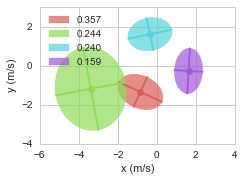

In [57]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [58]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUK3d9J/op7Vsv6uX2vqnb1+GZYLxMgBgmg2MC+MHB
Gxic8EjsgfM8ZpiQxz6MxxAH8EuIQwgGB7iQ5zdhc3I4YZjnPBj7BEPyjA12HNvE+PYqtVotqbXv
quX9ofurLpWqSrWqVe36nNPn9lXrV7+SVPXR57tTHMdxcODAgYNTCtdJn4ADBw4cWAmH5Bw4cHCq
4ZCcAwcOTjUcknPgwMGphkNyDhw4ONVwSM6BAwenGg7JOXDg4FTDITkHDhycajgk58CBg1MNh+Qc
OHBwquGQnAMHDk41HJJz4MDBqYZDcg4cODjVcEjOgQMHpxoOyTlw4OBUwyE5Bw4cnGo4JOfAgYNT
DYfkHDhwcKrhkJwDBw5ONRySc+DAwamGQ3IOHDg41XBIzoEDB6caDsk5cODgVMMhOQcOHJxqOCTn
wIGDUw3PSZ+Ag5MHx3FotVqgaRputxterxculwsURZ30qTlwYBgUx3HcSZ+Eg5NDs9lEsVjEyMgI
2u02ACCZTCIajWJkZAQul8shPQe2hqPkXsRgGAb1eh2ZTAbhcBg0TcPr9YLjOHAcB4ZhQNM0Wq0W
KIqC2+12SM+B7eCQ3IsQHMeBpmkwDAOKosAwDDY3N8EwDDweD1iWRa1Wg9/vh8dzfIkQ0ms2m3C5
XHC73XC73fB4PA7pORhaOObqiwwsy6LdboN87AcHB8jlclheXobP50Or1UIqlQJFUWi32/B4PAiF
QggGgwiFQnC73V3HI8ehKIonO4/H0/M8Bw5OCo6Se5GAmJ8MwwAAaJpGIpEAy7Lwer0YGRlBq9VC
IBCA1+vF2NgYwuEwms0marUaisUiDg8PedIjxCckM5qmwXEcms2mQ3oOhgYOyb0IwLIsaJoGy7Kg
KArlchn7+/uYmJjA6Ogo9vb2up5PURQ4jgNFUQgEAggEApiYmADHcWg0GqjX6ygUCkilUvB6vTzh
KZGey9XJVmq32xgdHXVIz8HA4JDcKQfxo5FgQiqVQqlUwtLSEq/U1HosKIriyUxIerVaDYVCAQcH
B/D5fF3mLSE3juNQr9eRTqf5AAb511F6DqyEQ3KnFGLztNVqIR6Pw+fzYX19nQ8oGAkWCEkP6ChG
ovTy+TwODg7g9/t5wiNriFIUKz2H9BxYAYfkTiHE5mk+n0cqlcKZM2cwMTHRQ2xiJUdISCtcLhfv
r5ucnORJr1arIZfLodFoAACy2SxPjkKl55CeAyvgkNwpg9A8ZVkWBwcHqNfrWFtbQyAQ6Hm+lWkf
QtIDgGq1inQ6DQA4OjpCs9lEIBDglV4gEHBIz4HpcEjulIDjOBweHiIUCsHv96PRaCAejyMcDmN9
fZ0nD7m1gLWEB3RIz+VyYWpqCkBHcdbrddRqNWSzWZ70iE9PLen5fD4nR8+BLBySOwUguW/5fB4e
jwflchmZTAbz8/MYGxtTXCtFDnrN1X4Q7+VyuRAOhxEOhwEcV2CQKoxWq8WbtUTpkWOISa/VaoFh
GESjUXi9Xof0HPBwSM7mIJULBMQcXF9fh8/nU3WMYckHd7vdiEQiiEQiAI5Jr1arIZ1Oo91u9yg9
QmYk4BEMBtFoNLoqMhzSe3HDITmbQlyaValUUK/XMTIygqWlJdU3tdzzhoH4lEjv8PAQNE3zpEeI
Xqz02u22Q3ovcjgkZ0MIgwsAcHh4iHw+j0AggPHxccM38LASgJj0aJrmSa9SqfApM0Tp+f1+h/Qc
OCRnJ4hz39rtNhKJBCiKwvr6OpLJpOZjWuV/GwQ8Hg9GRkYwMjICv9+Per2OSCTCJyczDMP780Kh
UFeAQkh6JJBBiM8hvdMFh+RsAnHuW6lUwv7+PqampjA1NdWVZGsG7Eh8LpeLJz2go/RqtRpfhiZU
eWLSY1mWD+AISc/j8cDj8TikZ2M4JGcDMAzDN7TkOA4HBwcol8tYWVnhc9AAfapMWKcqfMxukHrd
Ho8Ho6OjGB0dBdBRvsS8LRQKYFm2S+kJFZyQ9NrtNsrlMmZmZhzSsyEckhtiiIMLJPctEAhgY2PD
SYgVoR/xeL1eeL3eLtIjSi+Xy4HjuC6lR0iPKEJi3lIU5Sg9G8EhuSGF0DwFgFwuh8PDQ8zMzCAa
jZqW3yb0URk5jh1BWkqNjY2B47gupZfL5QAAwWCQbyQqVLxCpeeQ3nDDIbkhRD6fh9vtht/vB8uy
SCaTaDQasqVZBC8WcrICFEXB5/PB5/N1kV6tVkO5XEaz2cT29rak0gMc0htmOCQ3RCDmaTabxejo
KBiGQTwex8jISN/SLCM4DeRo9vkLSc/r9SKXy2FmZga1Wg3VahXZbBYul4snvGAwKEt6ALrmY7jd
bof0BgiH5IYEwtw3Ej2tVquqSrMIzCIru5KeVcTBcRxfI+vz+TA+Ps6PcSQ5eqRPnjCQIVRwDumd
HBySO2GIc98YhkG1WoXL5dJUmgXoJye7ktpJgqIo+P1++P1+RKPRLtIrl8s86QlbxcuRXiaTwfj4
OMLhMN9hxSE98+CQ3AlCri25x+PB+Pi4JoJzYB3EKTZSkCK9ZrOJer2OUqnEz8cQmreE9BqNBh+5
bbVaANAzH8MhPf1wSO6EIC7NSqVSKBQKWFxcRKlU0nVRG1Fk2WwWpVIJgUCAH03ooAO96pjMxxCS
ntRQIGEUnXzuRN2LZ946pKcdzpU8YIhz39rtNuLxODweDzY2NvhWSYMyO8kNVi6XcebMma5a0Hq9
3mVumRH4sMosVqO2jMCMemC5oUAMw/DzMYRKT0hmDunph0NyA4TYPC0Wi0gmk5iensbk5CR/oRpR
ZFrW1Wo1xONxUBSF5eVlfmYD6SpM6kBJ63K/38+TnrChpVrY9Ua0gkCF8zFKpRJmZ2fBcZzsUCCH
9PTDIbkBQdj3jeM4JJNJVKtVrK6u8oNgCKwOIHAch6OjI2QyGSwsLCCZTEqWdZGbi8xrICpP2NCS
kJ6w44cDbRBGb9UOBSLK2iG9/nBIzmLIlWYFg0Gsr69LlmYZITni25EDTdPY398HTdN89DaZTPZV
K3JdfGu1GlKpFGialu34MQhYGR222hSWOr6aoUBEWQuHAglJj6ZptFotJJNJLCwswOv1vihJzyE5
CyEsrAc6w1vS6TRmZ2cRjUZl16khK7l1Sjc7MU9HR0extLTEm5t6Lnip3m61Wg21Wg35fJ6vAxUW
v1sNu964akhUPBRISHr9hgIRvx9JcxEqPa/X20WOpxEOyVkAkvv27LPPYmNjAwCQTCbRarUQi8Xg
9/sV15udtyY2T0mBuvg5RnyCwo4fwpIoMqTG5XLB7/fzCsNO0duTUHL9IEV6UkOBgsFgT+QW6FZ6
p5307HOl2QTiwvpqtYpUKoXR0VEsLi6qctab6ZNjGAaJRKLLPJVaZyaEJVHC6gBSxbGzs8OnTwgj
iQ70Q+xOEJIeAGxtbfGt4sVDgQBp0nO73Xy+np1JzyE5EyHOfSPF9XLqSQlmkBwxT8ncBzVjCY3s
r3Refr8fo6OjqFarWFlZ4U0tEkk0Grm1EsOo5PqBkF4wGEShUEAsFuMnoaXTacVJaMDxtSxuFW9H
0nNIzgQQ85Smab7/WCKRAMdxWF5e5v1WamHUXOU4DrlcDul0WtdYQqsvYGH6BNDtXxLPX5W6AaVA
IpR2hJUkSo6tZSiQcBKaOJDRbDZBUVRPRcYwwyE5g5ArzZqYmABN07ouAL0XPAlYxONx1f6/YYDY
vyR1A5505NZKEgKsbS4gdWwp0iMNRIXvOXnfxSlCwpm3uVwO4+PjCAaDPFkOE/E5JGcA4ty3VCqF
UqmEpaUlhMP

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAAC3CAYAAADkZDmQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUFOf5x7/Lrgsia6iCiBgUUaOxXlGrbeMFqzEeTUK8
gPVyUj3G0phoTYzRo8RaK1qTX9pGTaw51nqr17bR9sRogtFoW6qmoKKgIhe5iCBBdgFdWOb3xzrD
sMzMziy7M7vL8zlnj+zMvPO+I/Pled7LfEfHMAwDgiA0I0DrBhBEW4dESBAaQyIkCI0hERKExpAI
CUJjSIQEoTEGtSvcsWMH0tLSUF9fj9mzZ2PmzJlqN4EgZNPY2Ih169YhJycHRqMRGzZsQI8ePbj9
aWlp2LZtGwwGA6ZPn45Zs2YBUHafqyrC9PR0/O9//8Nf/vIX1NXVYdeuXWpWTxCK+fLLL2G1WnHo
0CFkZGRg06ZN+PjjjwEA9fX1SE1NxdGjR9G+fXvMnj0b8fHxyM3NVXSfqyrC8+fPo2/fvnj99ddh
sVjwzjvvqFk9QSjm8uXLeO655wAAQ4YMwbVr17h9ubm5iI6OxlNPPQUAiIuLw8WLF3H9+nVF97mq
Ivzuu+9QUlKCTz75BEVFRUhOTsbJkyeh0+lEy1y+fFnFFhK+SFxcnOT+jIyvYLOFCu4zGo0YOHCg
aFmLxYKQkBDuu16vR0NDAwwGAywWC0wmE7evQ4cOsFgsiu9zVUUYGhqKXr16wWg0olevXggMDERl
ZSU6d+4sWe7Q+jOyzm82W2AyhTg/0Ifx92tUen2JKeOdHmOzhSIqeqPgvuLC1ZJlQ0JCUFNTw31v
bGyEwWAQ3FdTUwOTyaT4Pld1dDQuLg7ffPMNGIZBWVkZ6urqEBoq/BeKILyBYcOG4dy5cwCAjIwM
9O3bl9sXGxuLgoICVFVVwWq14tKlSxg6dKji+1zVSDh+/HhcvHgRM2bMAMMwSElJgV6vV7MJBKGI
iRMn4sKFC0hKSgLDMNi4cSNOnDiB2tpaJCYm4t1338XChQvBMAymT5+OiIgIREREKLrPVZ+ioMEY
wpcICAjA+vXrm22LjY3lfo6Pj0d8fHyLckruc5qsJwiNIREShMaQCAlCY0iEBKExJEKC0BgSIUFo
DImQIDSGREgQGqP6ZD1BaMGDR7e0boIoJEKiTZCPcYLbu6rbDEEoHSUIjSEREoTGkAgJQmNIhASh
MSRCgtAYTUZHHzx4gFdeeQW7du1q9mwWQXgbrloeJiQkcN403bt3R2pqqmgdqouwvr4eKSkpCAoK
UrtqglCMK5aHJpMJDMNg7969supQPR3dvHkzkpKS0KVLF7WrJgjFyLU8NBqNnOVhdnY26urqsGDB
AsyfPx8ZGRmSdagaCf/617+iU6dOeO655/DHP/5Rdjmz2eKRY30Vf79Gb7o+VywPg4KCsHDhQsyc
ORP5+flYtGgRTp48ybm0OaKqCI8dOwadTod///vfuHHjBlauXImPP/4Y4eHhkuXkWuD5ux0g4P/X
6G3X54rlYUxMDHr06AGdToeYmBiEhoaivLwckZGRgnWomo7u378f+/btw969e9G/f39s3rzZqQAJ
QktcsTw8evQoNm3aBAAoKyuDxWKRvM9p7ShBSOCK5eGMGTOwatUqzJ49GzqdDhs3bhRNRQENRSh3
5Igg3EFBbaHgdmcLuF2xPDQajfjggw9kt40ioZdxu6JOcn9EoEoN8TMeNv5Q6yaIQiLUGEfRxQ6M
Fj0292ohSmoB/eM69A5r7+mmESpBItQIvvikhMcndmA0zGYzTCYTbl9tSq9IkL4NiVADWAHKFZ8Q
bNncq4W4XUGR0ZchEaqIHPFlVVWJ7hsg8GYf9lxsZCQx+h4kQhWQk3ryxRfbV3jMLuvmPdhsNuir
qloIMnZgNEVFH4VE6GGcRT854uPvN5vNuF9aw5Xji9ExKgIUGX0BEqEHkStAR/FdMVeInjMGgdzx
uTfvSYqRIqNvQCL0EFIClCO+PjHCT5lk3y6F3vwYg0xhssVI/UXvhkToZlyJfnLExxIVEQKTyYQr
efe5bYMcxCjVXwRIjN4GidCNtEaAfPFl1paL1mFDA4bBxB1/K+8+rpgrmkXGrJv3AFCK6iuQCN2A
ktFPRwE6Rj5WgP26C6+6N5vNyHxoP2ZwcDhXno2MrBjlREUSondAImwlSub+5AhQTHx82GMyi5oi
5uCYLlxUBJpSVLGo2NaEmFNdKrh9khcowAua4HsoWe/prA/IIpWCZlqbbiCbwQa91YLBxkhOjNlF
5cisLcdgkRRVKCq2NSEaGgdq3QRRyPJQBrcr6pp9APtNzH7EUNoH5EfBTGsp9wGA/l3D0b9rOHp2
7NBiPxcZa+1i5FLUJ3VxfcWqqubzkuzoqZMnN9oyjY2NSElJQWJiIubNm4eCgoJm+9PS0jB9+nQk
Jibi8OHDzfY9ePAAY8eORW5urmQdqkbC+vp6rF69GsXFxbBarUhOTsaECRPUbIIiXFlk7YjQBLwc
AQJ24QnB337jXrn9+C7AYGNki6jI9RVFRlDbWkRUiitua2FhYYpcBVWNhMePH0doaCgOHDiATz/9
FL/+9a/VrF42QhFPKVlVVYLzgK4KsJDJRyGTj/Kg+yhk8rntbIRkyyqJiiwUEcVxxW0NUOYqqGok
nDx5Mp5//nkAAMMw0Ov1ssqp6bZWUmv/NzI27Mn5zIrPkWe1IrJ7x2Zlb9tqW5zPhgZEdwppvs1g
Q8+OHWBxqNcWZENMsAkwPqmj1p7ihD+y/5Kf7hCE/OoafFtXhD5PPQUAKKy04FtzKfqEhaC4zIL/
VZWhtz4YXSI7oLSoGlcePECM0X7CLj2/h9LcCuSUWdAtWPEluxVfd1tT6iqoqgg7dLD3ZywWC958
800sW7ZMVjm13NZuV9Sh7xDXHy8C7BFGr9c3++UAgN78uEUU1MPQ8jirBSEO2wCgknkAU4gJZosZ
phATBoWYkFVZhsqQB4jW9QQAfN9kwo175bijtw/cDDCZkF1Ujjt4hMG9I3Er7z7yYF9tY+pvQu7N
eyi02bjU1DTEhNyrhSh7rN2Evj+4re3du1eRq6DqAzOlpaWYP38+XnrpJUybNk3t6kVxRyomtRxN
aCWMnOkIKQZ0imixjZ+aOtZBqalyXHFbU+oqqKoIKyoqsGDBAqxYsQIzZsxQs2pJ3PGQrSuLscW4
cU94uiKrskxwO7+PCLTsT/brHs71P0mIypg4cSKMRiOSkpKQmpqKVatW4cSJEzh06BDatWvHua0l
JSVxbmtK0TEMw3ig7YJs2LABn3/+OXr16sVt27lzp+QI0uXLl3Fo/RlZ53cllfGkAAHxKCg1MZ9p
LRUcGS1k8hFtDIYppHm6mlVZxqWkLKyQBxubDGezi8oxONh+3lu8FTaAfdQUaD6pn3u1UPW0VOnv
MDFlPOLi4iSPuXz5Mj62ZgruSzYOdlre06jaJ1yzZg3WrFmjZpWycFWAUuIDXIuCzsirNUNvtQ/y
8NPRQia/mRD7dw3npi/4QsysLeeWuwlN6vOJHRiN2xoIsa3RpifrW5NuyRWg0ijIcuNeeYu0NFrX
E+GPunBiy6os41JUx0goBH/6QqhtsX27CtprUFrqWdq0CAHXoqAzAbI4eyxJjMHGSC56ifUPo3U9
m32kzsVHSPyOEVuof0h4DkkRVlZW4qOPPkJCQgKGDRuG4cOH45VXXsG2bdtQWVmpVhs9wu2KOo8J
0F1pqDMhSuGsjLOBGj6xA6MpGnoQ0T7h/v37cerUKUyaNAmbNm1CVFQUDAYDioqKkJ6ejiVLlmDy
5MmYP3++mu11C67eUEoE6GoUdGSwMRKZ1lJOVE93EB7EchSdYwTk0697OLJ5T2Cw/UM+Qo9B+fLS
NrGRZac++Co

In [59]:
PLOT_AXIS_RANGE

array([-6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. ,
       -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,
        5. ,  5.5,  6. ])

## Goodness-of-fit Statistics

In [60]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.971  0.066      0.313   350218.696  0.000003      0.031       0.279

In [61]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [62]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [63]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -14.346812137405346
     jac: array([  3.21122324e+00,   2.38418579e-07,   9.53674316e-07,
        -4.76837158e-07,  -4.76837158e-07,   0.00000000e+00,
         3.21122038e+00,   0.00000000e+00,  -1.43051147e-06,
         1.19209290e-07,  -4.76837158e-07,  -4.76837158e-07,
         3.21121752e+00,   2.38418579e-07,   2.38418579e-07,
        -1.19209290e-07,   3.57627869e-07,  -4.76837158e-07,
         3.21121907e+00,  -3.57627869e-07,  -1.19209290e-07,
        -3.57627869e-07,  -1.19209290e-07,   4.76837158e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1272
     nit: 47
    njev: 47
  status: 0
 success: True
       x: array([ 0.13611409,  0.28820263,  1.76264608,  1.03141266,  0.755641  ,
       -0.38939517,  0.15969662, -0.43593744, -1.4604904 ,  0.95264176,
        0.7398298 , -0.31357059,  0.60477081, -1.60461079, -0.5523718 ,
        1.9470407 ,  1.96174095,  0.16423982,  0.09941849,  1.77663599,
       -0.61450108,  0.6956706

## 6.1 GMM Result

In [64]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.605  -1.605  -0.552  1.947  1.962   0.164
2  0.160  -0.436  -1.460  0.953  0.740  -0.314
3  0.136   0.288   1.763  1.031  0.756  -0.389
4  0.099   1.777  -0.615  0.696  1.148   0.257

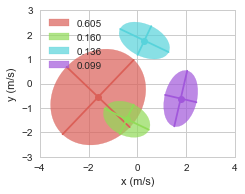

In [65]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [66]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.995  0.052      0.075      243.235  5.878394e-07      0.014       0.122

In [67]:
# Empirical Power
# gofs_mean_set_bivar

In [68]:
# %%time
# if df_all_years.index.year[0] <= 2000:
#     # GMM test against previous data
#     fig1, ax1 = plt.subplots(figsize=(3,2.5))
#     fig2, ax2 = plt.subplots(figsize=(3,2.5))
#     gofs_mean_set_bivar_previous = []
#     prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
#     for year_length in [10]:
#         color = next(prop_cycle)
#         start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
#         gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
#            for sub_start_year in arange(start_year, end_year+1)) 
#         gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
#         gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
#         gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
#         gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
#         gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
#         year_lim = end_year-year_length-5, end_year-year_length
#         gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
#         gofs_mean['year_lim']=year_lim
#         gofs_mean_set_bivar_previous.append(gofs_mean)

#     print('10 year comparison')
#     plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
#     plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
#     align_figures()
#     display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

In [69]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmULFd9JvhF7pWZlbW/2vfSAwYMehLjMWYYG4GNUMMI
CQECTDOW2nbTsnXAZm+aBguz2GCMscUiI2PUAwILH445Oo2PGRgDxgMIJDaBsGrPysrKfV9jmT+y
btTNyIjIWLMySvGd845KVXnvjaqM+PL77YwgCAJcuHDh4oLCc94X4MKFCxd2wiU5Fy5cXGi4JOfC
hYsLDZfkXLhwcaHhkpwLFy4uNFySc+HCxYWGS3IuXLi40HBJzoULFxcaLsm5cOHiQsMlORcuXFxo
uCTnwoWLCw2X5Fy4cHGh4ZKcCxcuLjRcknPhwsWFhktyLly4uNBwSc6FCxcXGi7JuXDh4kLDJTkX
LlxcaLgk58KFiwsNl+RcuHBxoeGSnAsXLi40XJJz4cLFhYZLci5cuLjQcEnOhQsXFxouyblw4eJC
w3feF+Di/CEIAlqtFliWhdfrhd/vh8fjAcMw531pLlyYBiMIgnDeF+Hi/NBsNlEsFjE6Oop2uw0A
SCQSmJiYwOjoKDwej0t6LhwNV8k9gcFxHOr1OtLpNCKRCFiWhd/vhyAIEAQBHMeBZVm0Wi0wDAOv
1+uSngvHwSW5JyAEQQDLsuA4DgzDgOM4bG9vg+M4+Hw+8DyPWq2GYDAIn+/sFiGk12w24fF44PV6
4fV64fP5XNJzMbRwzdUnGHieR7vdBnnbj4+PkcvlsLKygkAggFarhWQyCYZh0G634fP5EA6HMTIy
gnA4DK/X27Uf2YdhGJHsfD5fz+tcuDgvuEruCQJifnIcBwBgWRbxeBw8z8Pv92N0dBStVguhUAh+
vx9jY2OIRCJoNpuo1WooFos4OTkRSY8QH01mLMtCEAQ0m02X9FwMDVySewKA53mwLAue58EwDMrl
Mo6OjjA5OYlYLIaDg4Ou1zMMA0EQwDAMQqEQQqEQJicnIQgCGo0G6vU6CoUCkskk/H6/SHhqpOfx
dLKV2u02YrGYS3ouBgaX5C44iB+NBBOSySRKpRKWl5dFpabVY8EwjEhmNOnVajUUCgUcHx8jEAh0
mbeE3ARBQL1eRyqVEgMY5L+u0nNhJ1ySu6CQmqetVguHh4cIBALY3NwUAwpmggU06QEdxUiUXj6f
x/HxMYLBoEh4ZA1RilKl55KeCzvgktwFhNQ8zefzSCaTuHTpEiYnJ3uITarkCAnphcfjEf11U1NT
IunVajXkcjk0Gg0AQCaTEcmRVnou6bmwAy7JXTDQ5inP8zg+Pka9Xsf6+jpCoVDP6+1M+6BJDwCq
1SpSqRQAIJvNotlsIhQKiUovFAq5pOfCcrgkd0EgCAJOTk4QDocRDAbRaDRweHiISCSCzc1NkTyU
1gL2Eh7QIT2Px4Pp6WkAHcVZr9dRq9WQyWRE0iM+Pa2kFwgE3Bw9F4pwSe4CgOS+5fN5+Hw+lMtl
pNNpLCwsYGxsTHWtHDkYNVf7QXqWx+NBJBJBJBIBcFaBQaowWq2WaNYSpUf2kJJeq9UCx3GYmJiA
3+93Sc+FCJfkHA5SuUBAzMHNzU0EAgFNewxLPrjX60U0GkU0GgVwRnq1Wg2pVArtdrtH6REyIwGP
kZERNBqNrooMl/Se2HBJzqGQlmZVKhXU63WMjo5ieXlZ80Ot9LphID410js5OQHLsiLpEaKXKr12
u+2S3hMcLsk5EHRwAQBOTk6Qz+cRCoUwPj5u+gEeVgKQkh7LsiLpVSoVMWWGKL1gMOiSnguX5JwE
ae5bu91GPB4HwzDY3NxEIpHQvadd/rdBwOfzYXR0FKOjowgGg6jX64hGo2JyMsdxoj8vHA53BSho
0iOBDEJ8LuldLLgk5xBIc99KpRKOjo4wPT2N6enpriRbK+BE4vN4PCLpAR2lV6vVxDI0WuVJSY/n
eTGAQ5Oez+eDz+dzSc/BcEnOAeA4TmxoKQgCjo+PUS6Xsbq6KuagAcZUGV2nSn/PaZD7vX0+H2Kx
GGKxGICO8iXmbaFQAM/zXUqPVnA06bXbbZTLZczOzrqk50C4JDfEkAYXSO5bKBTC1taWmxArQT/i
8fv98Pv9XaRHlF4ul4MgCF1Kj5AeUYTEvGUYxlV6DoJLckMK2jwFgFwuh5OTE8zOzmJiYsKy/Dba
R2VmHyeCtJQaGxuDIAhdSi+XywEARkZGxEaitOKllZ5LesMNl+SGEPl8Hl6vF8FgEDzPI5FIoNFo
KJZmETxRyMkOMAyDQCCAQCDQRXq1Wg3lchnNZhO7u7uySg9wSW+Y4ZLcEIGYp5lMBrFYDBzH4fDw
EKOjo31Ls8zgIpCj1ddPk57f70cul8Ps7CxqtRqq1SoymQw8Ho9IeCMjI4qkB6BrPobX63VJb4Bw
SW5IQOe+kehptVrVVJpFYBVZOZX07CIOQRDEGtlAIIDx8XFxjCPJ0SN98uhABq3gXNI7P7gkd86Q
5r5xHIdqtQqPx6OrNAswTk5OJbXzBMMwCAaDCAaDmJiY6CK9crkskh7dKl6J9NLpNMbHxxGJRMQO
Ky7pWQeX5M4RSm3JfT4fxsfHdRGcC/sgTbGRgxzpNZtN1Ot1lEolcT4Gbd4S0ms0GmLkttVqAUDP
fAyX9IzDJblzgrQ0K5lMolAoYGlpCaVSydBNbUaRZTIZlEolhEIhcTShiw6MqmMyH4MmPbmhQHQU
nbzvRN1LZ966pKcf7p08YEhz39rtNg4PD+Hz+bC1tSW2ShqU2UkesHK5jEuXLnXVgtbr9S5zy4rA
h11msRa1ZQZW1AMrDQXiOE6cj0ErPZrMXNIzDpfkBgipeVosFpFIJDAzM4OpqSnxRjWjyPSsq9Vq
ODw8BMMwWFlZEWc2kK7CpA6UtC4PBoMi6dENLbXCqQ+iHQRKz8colUqYm5uDIAiKQ4Fc0jMOl+QG
BLrvmyAISCQSqFarWFtbEwfBENgdQBAEAdlsFul0GouLi0gkErJlXeThIvMaiMqjG1oS0qM7frjQ
Bzp6q3UoEFHWLun1h0tyNkOpNGtkZASbm5uypVlmSI74dpTAsiyOjo7AsqwYvU0kEn3VilIX31qt
hmQyCZZlFTt+DAJ2RoftNoXl9tcyFIgoa3ooEE16LMui1WohkUhgcXERfr//CUl6LsnZCLqwHugM
b0mlUpibm8PExITiOi1kpbRO7WEn5mksFsPy8rJobhq54eV6u9VqNdRqNeTzebEOlC5+txtOfXC1
kKh0KBBNev2GAhG/H0lzoZWe3+/vIseLCJfkbADJffvpT3+Kra0tAEAikUCr1cLGxgaCwaDqeqvz
1qTmKSlQl77GjE+Q7vhBl0SRITUejwfBYFBUGE6K3p6HkusHOdKTGwo0MjLSE7kFupXeRSc959xp
DoG0sL5arSKZTCIWi2FpaUmTs95KnxzHcYjH413mqdw6K0GXRNHVAaSKY29vT0yfoCOJLoxD6k6g
SQ8AdnZ2xFbx0qFAgDzpeb1eMV/PyaTnkpyFkOa+keJ6JfWkBitIjpinZO6DlrGEZs5Xu65gMIhY
LIZqtYrV1VXR1CKRRLORWzsxjEquHwjpjYyMoFAoYGNjQ5yElkqlVCehAWf3srRVvBNJzyU5C0DM
U5Zlxf5j8XgcgiBgZWVF9FtphVlzVRAE5HI5pFIpQ2MJ7b6B6fQJoNu/JJ2/KvcAyoFEKJ0IO0mU
7K1nKBA9CU0ayGg2m2AYpqciY5jhkpxJKJVmTU5OgmVZQzeA0RueBCwODw81+/+GAVL/ktwDeN6R
WztJCLC3uYDc3nKkRxqI0n9z8neXpgjRM29zuRzGx8cxMjIikuUwEZ9LciYgzX1LJpMolUpYXl5G
JBIZaOUCALR

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAAC3CAYAAADkZDmQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUFOf5x7/Lrgsia6iCiBgUUaOxXlGrbeMFqzEeTUK8
gPVyUj3G0phoTYzRo8RaK1qTX9pGTaw51nqr17bR9sRogtFoW6qmoKKgIhe5iCBBdgFdWOb3xzrD
sMzMziy7M7vL8zlnj+zMvPO+I/Pled7LfEfHMAwDgiA0I0DrBhBEW4dESBAaQyIkCI0hERKExpAI
CUJjSIQEoTEGtSvcsWMH0tLSUF9fj9mzZ2PmzJlqN4EgZNPY2Ih169YhJycHRqMRGzZsQI8ePbj9
aWlp2LZtGwwGA6ZPn45Zs2YBUHafqyrC9PR0/O9//8Nf/vIX1NXVYdeuXWpWTxCK+fLLL2G1WnHo
0CFkZGRg06ZN+PjjjwEA9fX1SE1NxdGjR9G+fXvMnj0b8fHxyM3NVXSfqyrC8+fPo2/fvnj99ddh
sVjwzjvvqFk9QSjm8uXLeO655wAAQ4YMwbVr17h9ubm5iI6OxlNPPQUAiIuLw8WLF3H9+nVF97mq
Ivzuu+9QUlKCTz75BEVFRUhOTsbJkyeh0+lEy1y+fFnFFhK+SFxcnOT+jIyvYLOFCu4zGo0YOHCg
aFmLxYKQkBDuu16vR0NDAwwGAywWC0wmE7evQ4cOsFgsiu9zVUUYGhqKXr16wWg0olevXggMDERl
ZSU6d+4sWe7Q+jOyzm82W2AyhTg/0Ifx92tUen2JKeOdHmOzhSIqeqPgvuLC1ZJlQ0JCUFNTw31v
bGyEwWAQ3FdTUwOTyaT4Pld1dDQuLg7ffPMNGIZBWVkZ6urqEBoq/BeKILyBYcOG4dy5cwCAjIwM
9O3bl9sXGxuLgoICVFVVwWq14tKlSxg6dKji+1zVSDh+/HhcvHgRM2bMAMMwSElJgV6vV7MJBKGI
iRMn4sKFC0hKSgLDMNi4cSNOnDiB2tpaJCYm4t1338XChQvBMAymT5+OiIgIREREKLrPVZ+ioMEY
wpcICAjA+vXrm22LjY3lfo6Pj0d8fHyLckruc5qsJwiNIREShMaQCAlCY0iEBKExJEKC0BgSIUFo
DImQIDSGREgQGqP6ZD1BaMGDR7e0boIoJEKiTZCPcYLbu6rbDEEoHSUIjSEREoTGkAgJQmNIhASh
MSRCgtAYTUZHHzx4gFdeeQW7du1q9mwWQXgbrloeJiQkcN403bt3R2pqqmgdqouwvr4eKSkpCAoK
UrtqglCMK5aHJpMJDMNg7969supQPR3dvHkzkpKS0KVLF7WrJgjFyLU8NBqNnOVhdnY26urqsGDB
AsyfPx8ZGRmSdagaCf/617+iU6dOeO655/DHP/5Rdjmz2eKRY30Vf79Gb7o+VywPg4KCsHDhQsyc
ORP5+flYtGgRTp48ybm0OaKqCI8dOwadTod///vfuHHjBlauXImPP/4Y4eHhkuXkWuD5ux0g4P/X
6G3X54rlYUxMDHr06AGdToeYmBiEhoaivLwckZGRgnWomo7u378f+/btw969e9G/f39s3rzZqQAJ
QktcsTw8evQoNm3aBAAoKyuDxWKRvM9p7ShBSOCK5eGMGTOwatUqzJ49GzqdDhs3bhRNRQENRSh3
5Igg3EFBbaHgdmcLuF2xPDQajfjggw9kt40ioZdxu6JOcn9EoEoN8TMeNv5Q6yaIQiLUGEfRxQ6M
Fj0292ohSmoB/eM69A5r7+mmESpBItQIvvikhMcndmA0zGYzTCYTbl9tSq9IkL4NiVADWAHKFZ8Q
bNncq4W4XUGR0ZchEaqIHPFlVVWJ7hsg8GYf9lxsZCQx+h4kQhWQk3ryxRfbV3jMLuvmPdhsNuir
qloIMnZgNEVFH4VE6GGcRT854uPvN5vNuF9aw5Xji9ExKgIUGX0BEqEHkStAR/FdMVeInjMGgdzx
uTfvSYqRIqNvQCL0EFIClCO+PjHCT5lk3y6F3vwYg0xhssVI/UXvhkToZlyJfnLExxIVEQKTyYQr
efe5bYMcxCjVXwRIjN4GidCNtEaAfPFl1paL1mFDA4bBxB1/K+8+rpgrmkXGrJv3AFCK6iuQCN2A
ktFPRwE6Rj5WgP26C6+6N5vNyHxoP2ZwcDhXno2MrBjlREUSondAImwlSub+5AhQTHx82GMyi5oi
5uCYLlxUBJpSVLGo2NaEmFNdKrh9khcowAua4HsoWe/prA/IIpWCZlqbbiCbwQa91YLBxkhOjNlF
5cisLcdgkRRVKCq2NSEaGgdq3QRRyPJQBrcr6pp9APtNzH7EUNoH5EfBTGsp9wGA/l3D0b9rOHp2
7NBiPxcZa+1i5FLUJ3VxfcWqqubzkuzoqZMnN9oyjY2NSElJQWJiIubNm4eCgoJm+9PS0jB9+nQk
Jibi8OHDzfY9ePAAY8eORW5urmQdqkbC+vp6rF69GsXFxbBarUhOTsaECRPUbIIiXFlk7YjQBLwc
AQJ24QnB337jXrn9+C7AYGNki6jI9RVFRlDbWkRUiitua2FhYYpcBVWNhMePH0doaCgOHDiATz/9
FL/+9a/VrF42QhFPKVlVVYLzgK4KsJDJRyGTj/Kg+yhk8rntbIRkyyqJiiwUEcVxxW0NUOYqqGok
nDx5Mp5//nkAAMMw0Ov1ssqp6bZWUmv/NzI27Mn5zIrPkWe1IrJ7x2Zlb9tqW5zPhgZEdwppvs1g
Q8+OHWBxqNcWZENMsAkwPqmj1p7ihD+y/5Kf7hCE/OoafFtXhD5PPQUAKKy04FtzKfqEhaC4zIL/
VZWhtz4YXSI7oLSoGlcePECM0X7CLj2/h9LcCuSUWdAtWPEluxVfd1tT6iqoqgg7dLD3ZywWC958
800sW7ZMVjm13NZuV9Sh7xDXHy8C7BFGr9c3++UAgN78uEUU1MPQ8jirBSEO2wCgknkAU4gJZosZ
phATBoWYkFVZhsqQB4jW9QQAfN9kwo175bijtw/cDDCZkF1Ujjt4hMG9I3Er7z7yYF9tY+pvQu7N
eyi02bjU1DTEhNyrhSh7rN2Evj+4re3du1eRq6DqAzOlpaWYP38+XnrpJUybNk3t6kVxRyomtRxN
aCWMnOkIKQZ0imixjZ+aOtZBqalyXHFbU+oqqKoIKyoqsGDBAqxYsQIzZsxQs2pJ3PGQrSuLscW4
cU94uiKrskxwO7+PCLTsT/brHs71P0mIypg4cSKMRiOSkpKQmpqKVatW4cSJEzh06BDatWvHua0l
JSVxbmtK0TEMw3ig7YJs2LABn3/+OXr16sVt27lzp+QI0uXLl3Fo/RlZ53cllfGkAAHxKCg1MZ9p
LRUcGS1k8hFtDIYppHm6mlVZxqWkLKyQBxubDGezi8oxONh+3lu8FTaAfdQUaD6pn3u1UPW0VOnv
MDFlPOLi4iSPuXz5Mj62ZgruSzYOdlre06jaJ1yzZg3WrFmjZpWycFWAUuIDXIuCzsirNUNvtQ/y
8NPRQia/mRD7dw3npi/4QsysLeeWuwlN6vOJHRiN2xoIsa3RpifrW5NuyRWg0ijIcuNeeYu0NFrX
E+GPunBiy6os41JUx0goBH/6QqhtsX27CtprUFrqWdq0CAHXoqAzAbI4eyxJjMHGSC56ifUPo3U9
m32kzsVHSPyOEVuof0h4DkkRVlZW4qOPPkJCQgKGDRuG4cOH45VXXsG2bdtQWVmpVhs9wu2KOo8J
0F1pqDMhSuGsjLOBGj6xA6MpGnoQ0T7h/v37cerUKUyaNAmbNm1CVFQUDAYDioqKkJ6ejiVLlmDy
5MmYP3++mu11C67eUEoE6GoUdGSwMRKZ1lJOVE93EB7EchSdYwTk0697OLJ5T2Cw/UM+Qo9B+fLS
NrGRZac++Co

## 6.3 Univariate Goodness-of-fit

In [70]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [71]:
kap_params = distr.kap.lmom_fit(df.speed.copy().as_matrix())
kap = distr.kap(**kap_params)

D:\ProgramData\Anaconda3\lib\site-packages\lmoments3\distr.py:433: RuntimeWarning: invalid value encountered in power
  np.where(k == 0, 0., (1 - h ** (-k)) / k),


D:\ProgramData\Anaconda3\lib\site-packages\lmoments3\distr.py:433: RuntimeWarning: invalid value encountered in power
  np.where(k == 0, 0., (1 - h ** (-k)) / k),


Speed Distribution Comparison
(0.98173926017974145, 0.87709339850790724, 0.99248489209003432)
Wall time: 19.3 s


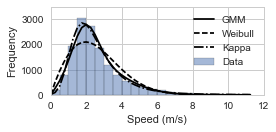

In [72]:
%%time
x = arange(0, max_speed, 0.5*BIN_WIDTH)
# 1. Fit Weibull
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max(), BIN_WIDTH), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed)*BIN_WIDTH,'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed)*BIN_WIDTH, '--', color='black', label='Weibull') 
plot(x, kap.pdf(x)*len(df.speed)*BIN_WIDTH, '-.', color='black', label='Kappa')

print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em, BIN_WIDTH))

In [73]:
bin_width=BIN_WIDTH
bins = arange(0, df.speed.max()+bin_width, bin_width)

density_expected_kap = kap.cdf(bins[1:]) - kap.cdf(bins[:-1])
density, _ = np.histogram(df.speed, bins=bins, density=True)
print(sector_r_square(density*bin_width, density_expected_kap))

beta_params = sp.stats.beta.fit(df.speed)
density_expected_beta = beta.cdf(bins[1:], *beta_params) - beta.cdf(bins[:-1], *beta_params)
print(sector_r_square(density*bin_width, density_expected_beta))

D:\ProgramData\Anaconda3\lib\site-packages\lmoments3\distr.py:433: RuntimeWarning: invalid value encountered in power
  np.where(k == 0, 0., (1 - h ** (-k)) / k),
D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)


0.987631575868
0.948199504563


In [74]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in  x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX+x/EXM+yLIouiJigqqKkXQVFzF/m53RZXQC+2
eK9p3VwumlppZm5dl5tZri2Wae6llEtpLoVLOIpmKrkimEAqLsMg25zfH8QIogjKcAb8PB+PHg/n
nDNn3pjz4Xu+53y/XytFURSEEKIMadQOIISofKSwCCHKnBQWIUSZk8IihChzUliEEGVOCosQosyZ
tbAcPXqUyMjIItt//PFH+vXrR1hYGGvXrjVnBCGECqzNdeJly5axefNmHBwcCm3Pzs5m5syZrF+/
HgcHByIiIujatSseHh7miiKEKGdma7F4e3uzYMGCItvPnj2Lt7c3VatWxdbWlqCgIGJjY80VQwih
ArO1WLp3705SUlKR7Xq9HhcXF9NrJycn9Hr9A8+n0+nKNJ8QouSCgoJKdbzZCsv9ODs7k56ebnqd
np5eqNAUp7Q/nLnpdDqLywSWlctoNHL8+HE++eQTEhIScKlWE93R3zh36giZGff/haLV2mCl1WJj
a4/WxgFrW0ecXKpSp/7fcHRxJe2GASsUatSojr1jFewdXbhq0OLo5MITNaqhtbElKfWvf2dWUKe6
MwCJKXrT63SDASdHR5KvGsjONZqOSb5qIDvHiI21Bi93R9M2wPT6XtvK4n0uDpgylcXn3esYgFoe
zoyLbFnM/7k7HuaXerkXlvr165OQkMD169dxdHTk0KFDDB06tLxjCDNKSkri008/5fPPPychIYHc
3Nwix9jaO+HgXA07p2q4etSiRm1fPGrWx93Lh/RcJ2zsHE1fhMSUvAJU8MtRsEDkU/4qENa2dqbj
s3OM2GjvXPHbWBe9+q/iZMPN9OxCr6/eyKSKk22hbWBV5H0Ft5XF+xRjVpl+3r2OAQgJ9i7y91CW
yq2wREdHYzAYCAsLY8KECQwdOhRFUejXrx81atQorxjCDBISEpg/fz6bN2/m9u3bXLp0qdB+O0cX
qrrXpmr1BnjWDaS+fzPc/+qsT0zRF/ltmp6iJzvXaHqdXyDu3na3hy0QjvY2hAT7kPDHTZKvpdPg
iWqEBFcxvfZyczJ9EXf+cvG+28rifWcTU6nl4Vxmn3e/YwL9qz/w/+ujsKooo5stqXmfzxIzQfnk
unjxIm+88Qbfffcd169fN23XWtvg0yiYBv7NcKz2BLXrB2Jj50C6wcC1W3mF4e6me8HLkPxtcKc5
b7idzdUbmYXeZ7idDVjhaF/4d2Pb5rUKfYl8at3/i3c2MZX6daqXyxetpCzx39TDZCr3SyFRcd26
dYuVK1cSHR3N9u3bTZc4Nrb21PRpjO/fQmka3A1raxsgrzWSrdhg89f779XyuLuVkb+tYKvC0T7v
DG5VHcjKzi22JVDSAhHoX90iv8SVhRQW8UAnTpzgn8Ne5cC+PeQ3cH39nsSuyhM0b/csNX0amzoJ
s3KssP7rX5WNtYab6VmmVkX+pUnBPo+7L0NKWzQspaUhCpPCIu7JaDSyZcsW3nzzTY4dO2ba7lbD
h56Rk8i1q0kVJ1tT0cjOyWuFFCkkNzNN771fy+N+xUGKRsUlhUUUoigK7y9ewX9nvkty4hnT9ica
BNC13xjcauS1JhJT9IWKyL0ucxztbXCr4oBbFXvOJhpMnZJSMCo/KSzCZOfOnbzy2ih+P/kbVlYa
Gv6tMwD12wzG26duoY5SG2tNkb6Suy9zAAZ086tU/RmH41PZ8ctFkq+m4+XuRDcplPckhUXw66+/
MnLkSHbv3g2Aja0DA/49n+pPNATy7tIUbJ1A0U7X0l7mVESH41NZseWE6fXlK3rT64f9OQ8ePMjo
0aNp0KABiqJw/fp1XnnlFXr16nXP4//44w9OnTpF165dH+rzyosUlseYwWBg6tSpzJ4zB+Nfd3hs
7Z1p98y/8azdwHTc3X0lcP9O18pUSO6245eL99y+85eLj/Rzt2nThv/9738AxMTEMHfuXOrVq0fj
xo2LHHvgwAHOnTsnhUVYpq1bt/LKK69w4cIF07ambf6O31P/wMrGiYzMXFMLpWBfyeNSRO4l+Wr6
vbdfu/f2h2Fvb09YWBhbtmzhyy+/JDk5mdTUVLp27crIkSNZunQpt2/fpkWLFri4uPDhhx+iKArp
6emmgmQJpLA8ZvbEnmb0yNeIO7AdjVZLcEg4ly/G06Jjf3yffMr0MNrdlz75fSWPMy93Jy5fKTq+
ycvNqUw/x93dne+//54ePXowYMAAMjMz6dixI2PGjGHYsGGcO3eOkJAQVq5cyezZs6lRowaLFy9m
27ZtjBgxokyzPCwpLI+Rz9duZeSIl7h5LRk7BxeeHTqDXKe6/K2rHU4OeX0k+X0ltwzZaDRWj23r
5F66BXsX6mPJV9bjbv744w9atGjBr7/+yoEDB3B2diYrK6vIcTVq1GD69Ok4OjqSkpJCYGBgmeZ4
FFJYHgNGo5F58+YxfsIEjLm5aK1tycy4xdWUC3j6+XLLkG0qLJBXXBo8Ua3Eo18fF/nF9WGf9i0J
g8HAunXr6N+/PxkZGUydOpWEhATWrl2LoihoNBqMxry7cZMmTeKHH37A2dmZ8ePHY0mjc6SwVGKH
41PZtPMYX3z4FhdOHsTOwZmc7EyMxhxCw8fzZHCPvEufuzpmwfyjXyuqQP/qZd56O3DgAJGRkWg0
Gq5fv85rr71GvXr1iIqKIi4uDltbW3x8fEhNTcXPz49Fixbx5JNP8swzzzB48GAcHBzw8PAgNTW1
THM9CiksldTh+FTmL9/GpmUTuXH1Dzxq1edq8gU0Gi1PvzgN3yfbAtIxq7bWrVuzf/9+0+uCz/ts
3ry5yPE1atRg+/btAPTu3bt8Qj4EKSyV1LIVm1j7wVhuG27SOjSSRkGhfPPxGwT1fA3fJ4MLHSsd
s6KsSWGpRPKfCv3+u/XsWj8XRVFoFTKINj1exMrKiufHLyczR6GWh7O0ToRZSWGpJA7Hp/LFd79x
6MfVxHy3FBs7R+oF9CR25yoA2vX+Fxqtlvo1Sj4loRAPSxYsqyR+OJjAvq2fEPPdUpyqeNC6x784
HfsNNvZONArqZjpOOmVFeZAWSyWx6atFxO5YiatHbYJ7/otda2ah0WjoOHAynrV85bJHlCspLBVU
wVG2J/etZf+2z6jiVpNnhs5g3UejyMnOovfzU+jYtatc+ohyJ5dCFVD+KNvLV/Qc2rWGbesW4uxa
nd5D/4tbDW/a9n6ZLv1G0aB5B7n0qQASExMZOXIkAwcOZNq0aQwbNozTp0+zYMECGjduTEpKiunY
q1ev8uSTT7Jx40aSkpLw9/dn6dKlhc43fPjwey5tXJ6kxVIB5Y+yjfvpa37avAjnqh70HT4Ha6tc
ank4k9G8o8VNEl0RjBs3jnXr1pXpOQcMGMDs2bPvuz8jI4MRI0bw7rvv0qJFC3Q6HTY2NkydOpXg
4GDq1q3L1q1beeGFFwDYsmULNWvWNL3f29ub7du3M2zYMADS0tJISEhQfcliabFUQMlX0zn32z52
f7MARxc3+o2Yx+9HfmT5e0Np5HqZf3WvwbjIllJUKoBdu3bRpk0bWrRoYdrWvHlzvvjiCwB69erF
tm3bCh3fpUsX0+tq1arh7u7O2bNngbxR6z169Cin9PcnLZaKKCOZrV9Ow9raluf+NZObackc+P5z
qrl70a5dO86fP692wgpp9uzZxbYuzCEpKQlv7zuXq3PnzkWr1ZKamkrLli1p2rQpDg4OJCYmYjQa
8fLyws7OrtA5evfuzXfffcfIkSPZuXMn//nPfzh06FC5/hx3k8JSARTsqHWxzWbVgnFkZ2bQa8hk
HJyr8fWS19F

0.0305198849602 0.0738193687294
2.25 2.75
Wall time: 29.9 s


In [75]:
print(np.abs(y_ecdf - kap.cdf(x)).max())

y_cdf_beta=beta.cdf(x, *beta_params)
print(np.abs(y_ecdf - y_cdf_beta).max())

0.0154847692137
0.0497089786329


D:\ProgramData\Anaconda3\lib\site-packages\lmoments3\distr.py:433: RuntimeWarning: invalid value encountered in power
  np.where(k == 0, 0., (1 - h ** (-k)) / k),


In [76]:
dir_ =df['dir'].as_matrix()
dir_data = [cos(dir_/180*pi), sin(dir_/180*pi)]
n_vM_dir = 4

In [77]:
%%R -i dir_data,n_vM_dir -o result,theta,alpha
result = movMF(dir_data, n_vM_dir, nruns = 10)
theta = result$theta
alpha = result$alpha

In [78]:
# print(result)
dir_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

Direction Distribution Comparison
0.976540407695
0.987804179974
Wall time: 9.56 s


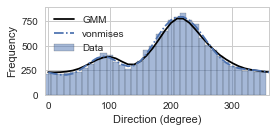

In [79]:
%%time
# 1. Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

# 2. Caculate von Mises
y_vonmises = 0
for k, u, w in dir_params:
    y_vonmises = y_vonmises + vonmises.pdf(x, k, loc=u)*w

# plot
plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, y*len(df['dir']) ,'-', color='black', label='GMM')
plot(x/pi*180, y_vonmises*2*pi/36*len(df['dir']), '-.', label='vonmises')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, y[:-1]))
print(sector_r_square(density*10, (y_vonmises*2*pi/36)[:-1]))

In [80]:
speed_params = k, h, scale, loc = kap_params['k'], kap_params['h'], kap_params['scale'], kap_params['loc']
speed_cdf = sp.stats.kappa4.cdf(df.speed, h, k, loc=loc, scale=scale)
alpha_cdf = 0
for k,u,w in dir_params:
    alpha_cdf = alpha_cdf + vonmises.cdf(df.dir/180*pi, k, loc=u)*w
phi_ = 2*pi*(speed_cdf-alpha_cdf)
phi = phi_%(2*pi)

In [81]:
phi_data = [cos(phi), sin(phi)]
n_vM_phi = 3

In [82]:
%%R -i phi_data,n_vM_phi -o result,theta,alpha
result = movMF(phi_data, n_vM_phi, nruns = 10)
theta = result$theta
alpha = result$alpha

In [83]:
# print(result)
connection_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

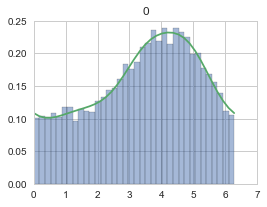

In [84]:
fig, ax = plt.subplots(figsize=(4,3))

x = linspace(0,2*pi, num=36+1)
y = 0
for k, u, w in connection_params:
    y = y + vonmises.pdf(x, k, loc=u)*w
pd.DataFrame(phi).hist(bins=x, ax=ax, alpha=0.5, normed=True)
ax.plot(x, y, label='vonmises pdf')

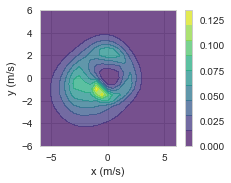

In [85]:
X = Y = PLOT_AXIS_RANGE
XX, YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T

x = [ np.sqrt(x**2 + y**2) for x,y in coords]
alpha = [ np.arctan2(y, x) for x,y in coords]
al_pdf = angular_linear_pdf(x, alpha, speed_params, dir_params, connection_params)
al_Z = al_pdf.reshape(XX.shape)

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,al_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [86]:
gof_df(al_pdf, kde_result)

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0 -1.600698  5.734      7.336    20366.241  0.000279      0.299       2.661

In [87]:
temp = angular_linear_pdf(x, alpha, speed_params, dir_params, connection_params)
temp.max(), temp.argmax()

(0.13190134395971242, 260)

In [88]:
# Empirical Power
if 'gofs_mean_set_df' in globals():
    display(gofs_mean_set_df)

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.012187  0.998669      0.923606
(1997, 2002)  0.009181  0.999039      0.959555
(1991, 1996)  0.011546  0.998940      0.926596

In [89]:
%%time
if df_all_years.index.year[0] <= 2000:    
    fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
    fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
    fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    gofs_mean_set = []

#     x = arange(0, df['speed'].max()+1)
    x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
    _, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x, bin_width=BIN_WIDTH)
    _, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x)

    for year_length in [10]:
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs = []
        for sub_start_year in arange(start_year, end_year+1):
            df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]

            _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

            r_square_speed = sector_r_square(density_speed*BIN_WIDTH, density_speed_expected_gmm)
            r_square_speed_weibull = sector_r_square(density_speed*BIN_WIDTH, density_expected_weibull)

            k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
            k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()

            r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
            gofs.append({'year': sub_start_year, 
                         'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                          'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

        gofs=pd.DataFrame(gofs).set_index(['year'])  
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)

        color = next(prop_cycle)
        # GMM agains previous data
        gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
        gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
        gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
        # Empricial agains previous data
        ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
        ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
        ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
        color = next(prop_cycle)
        gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
        gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)

        plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
        plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
        plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

    align_figures()
    display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN8AAAC3CAYAAACSXosbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlYVdX+/1+HeTrMs8yIoCgqmOIQ5kAq6i0HVDQztVKv
5dDN0Mq5W35vpr+y8mpmpd2yNMssp8SBckBAEWVQGRNlnmc4sH9/EKcIUUTkgKzX8/jI2Xuvtdfn
nPM+a+29P+u9ZJIkSQgEgjZHTdUNEAg6K0J8AoGKEOITCFSEEJ9AoCKE+AQCFSHEJxCoCJWJ7/Ll
y8ycObPR9hMnTjBp0iSmTp3Kt99+C0BtbS2rVq1i6tSpzJw5k9TUVABSU1MJCgpi+vTprF69mtra
2jaNQSB4ICQVsH37dmncuHFSYGBgg+1VVVXSyJEjpYKCAqmyslKaOHGilJ2dLR09elQKDg6WJEmS
Ll26JM2fP1+SJEmaN2+edP78eUmSJGnlypXSsWPH2jYQgeABUEnP5+DgwJYtWxptT0xMxMHBASMj
I7S0tPDx8SE8PJzIyEgef/xxAPr06cPVq1cBiImJoX///gD4+flx9uzZtgtCIHhANFRx0lGjRpGW
ltZoe0lJCXK5XPlaX1+fkpISSkpKMDAwUG5XV1dHoVAgSRIymUx5bHFx8T3PHRkZ2QoRCATNx8fH
547bVSK+pjAwMKC0tFT5urS0FLlc3mh7bW0tGhoaqKmpNTjW0NCwWee505sRGRnZ5JvUUZH+yByU
yWRciMngWFgq2bn5DX7gFk3pi6WpHntDrrP7cBx/Tzb85PWRWJvp80tYKqcupmFurIuJXBt9XU30
tDUY8ZgDOtoaZOaVUVhSibamOtpa6sr/dbU1kMlkVCtqUdTUUlMrUVsrIUkS6upq6OvU7f/rD6kk
SdTUSigUtWhrqSOTySgpq6K0QkFtrUStVFdHTa2Ek03dZx6TlMuNm/kUl1VTVl5NcWEOnh4uDO9n
j7amOhWVCtTV1dDUaPlgT5IkFDW1qKmpoa4ma1aZu/3Ytyvxubq6kpqaSkFBAXp6ekRERDB37lxk
MhknT54kICCAqKgounXrBkCPHj0ICwtjwIABhIaG4uvrq+IIVEdFpYLfM4tJyyrmZmYJSbcLSUwr
4J1/DsHeSk5+cQVhMRl1B2dUKstVVtcAYGtuQE8Xc6zN9LA208fGTB8rMz3MjHQA8B/giP8AxybP
b2Wqh5WpXpP7NTXu/sWvF1793xrqMjTU/zzeQE8LAz2tJst7upjh6WKmfF33Y+qkfK2j/eBfdZlM
hqaG+gPXU0+7EN/BgwcpKytj6tSpLF++nLlz5yJJEpMmTcLKygp/f3/OnDnDtGnTkCSJt99+G4Dg
4GBWrlzJpk2bcHFxYdSoUSqO5OFRXFbFtdR8CksqKSqtUv7/Dz9XnGwMCY/N5D9fRjQoY2mqR0FJ
JfZWcob07sIATxuux1/B29ub+q+62h+/4IN72zK4t20bR9W5UZn47OzslI8Sxo8fr9w+fPhwhg8f
3uBYNTU11q1b16gOZ2dnvvzyy1ZvW1FpFRevZRGblIupkQ6DvWyxt5Lfu2ArUlVdQ9T1bOysDLA1
NyD5diFrd5xvdJy7owlONoZ0tTfmH4+7YGdpgJ2VHEdrQwz1/+wp9HU1AVBXa9ijCFRHu+j52pr/
2xWOvZUcO0sD7K3k2FrU3cz5PaOID/de5lpqHrV/ufZxsJJjbyXn+u/57PnlGi5djLCzMMDGXB9b
CwPkdxkO3Q9V1TVExmdx5vJtLsRmUF6pYPJwN2aN7YGdpZxnA7pjqK+NkYEWRn/8b/rHsNDGXJ8X
nu7VKu0QtA2dUny/Xb7d4PUT3nY84QEmhjrcuFmAh5Mp/bpb0dvNgoLiSjycTAFIvFVIeGwm4bGZ
Dcq/88/B9HQ1JzWjiGup+fR0McPGXL/Bdcy9qKqu4bl1xyguqwLqhoyjBzrxeJ8uAJga6hA4otuD
hC1oZ3RK8e1880luZtXdnEjLLKGHsymQhVxPi/+tG42ejuYdy40Z6IRvT2tSbhdxO6eU2zklpOeU
KnvOs5dv89WxawCYyLXxdDGjp4sZAYOdkclkpKQXkZ1fhgRUK2q5dC2LwpJK3pg9AC1NdQZ52aCv
o8mQPrZ0tTO+L/EKOh6dUnwWJrpYmOji7W6p3BYZmQXQpPDqMZHrYOKuQ1/3xvuG+thhaKBNTFIu
MUk5/Hb5Nr9dvs3YIS4A/PRbEkfPpzYoY2qoQ3mlAl1tDV4K7POAkQk6Ep1SfA8LW/O6myNjBzsj
SRLpuaXEJuUqn2EN6mWLjZk+MlndbWtXOyM8Xcyb/cxI8GghxPeQkMlkSjHW4+1hibeH5V1KCToT
4p6zoFUor6zLPhE0H9HzCZpNYUkl4bEZJN0uIq+ogvyiCvKLKskvrqCiqga5nhbe7pb4dLekbzdL
jOXaqm5yu0aIT3BXcgrKOXclnfNX07mamNPg+adMBkYG2tiaG2BkoMXvmcWcvpTG6UtpyGTgameM
j4clHo6muHQxwkSu/cjdwa1W1PJrVBrhsZn0dDFjqI89Brp3v2lXjxBfJyG/qIKQiJuU5JfRo2fd
3dWmyCuqIPRSGr9G3eL67wXK7e6OJgzqZUNPV3PMjHQwNtBG/S/ZMpIkkZpRTGRcJpHxWcQm55Jw
88/yxgbaONsa4tLFCGdbIxxtDOliod+q+ZIPSnpOKeFxGVy6lo2WphqPdbeiX3frRr14WUU1x8JS
OXA6kZzCCqDu+fHOgzEM7m3LkwMcG+Sa3gkhvkeckrIq9p9K4Mdfk6isqkuiPhh+hP49rHi8Txd8
uluhralOeaWCc1fSORl5k+gb2dRKdXmfvd3MGdjLFt+e1pgZ6d71XDKZDCcbQ5xsDJk03I2yimqu
JuaSmFZA0u1Ckm4Xcel6NpeuZyvLqKnJsDHTx8FajoOVHJcuRvR1t7zrj0NrUlZRzY3fCwiPyyQi
LoNb2aUN9p+NTkcmg24OJvTvYY2XmzkXYjI4dDaF0vJqdLTU+YefC8N87Ll8PZtjYamcjEzjZGQa
tub6vPikSZPnFuJ7RKmoVHDwtyS+O5lAaXk1poY6zArowbWEFBIya5XPIHW1NXB3NCEuJU8pTg9H
E57wsWdIb1uMDFp+3aano0l/T2v6e1ort5WUVZF8u4jk24X8nlnM7xnF/J5ZzK0rJZy7kg6AloYa
fd0tGeRlS39P62YP4+5GQloB56+kk11QTl5hBTmF5eQWVlBeqVAeo6OlzgBPax7rYYWPhxUVVQou
xGRyITaDuORcrqXmw+G6Y40MtHhmtAcBg52V6YVd7YyZOKwrMUm5HA1L5ezl20DT4pNJUueyi29q
3t6jMJ9PkiR+zywmPDaTA6GJFBRXItfTZPLwbowd4oy2pjqRkZF4e3uTdKuQX6Nu8WvULbLyy7Ex
12eYjz1PeNthY67f5u3OL67kZkYxV5JyOBudzs3MuonRGuoyvNws8HQ2w1iujbGBNoYGWhgbaGNk
oN1kDxkZGUnfvt5ExGXy/ekEribmNtgv19PCzEgHc2NdbC308fGwoperWZND4OKyKiLjMrmalItL
FyNGPOaAtubdh8slZVVci7vS5PdKiO8e29s7RaVVXL6ezcVrWVy6nkXuH9cfutrqPOXXlaeHuipn
NEDjOCVJIq+oAlNDnXZ1M+RmZjFnr9zm3JV0EtMKmzzO1FAbly7GuHYxwqWLEa52xhgZaPH5/jNE
pVQrh5F9u1kQMNgZB2s5Zka69xROa3G375UYdnYwqqpriEvJ4/KNbKKuZ5OQVqCcfW6or4Vf3y54
u1vyWA/rBlOKmkImk93zWk4V2FvJmWrlztSR7mTmlXEzs5jCkkoKSyopKKmbz1hQXMnvGUVExGUS
EfdnsruaDGo

k_s  k_s_weibulll  r_square  r_square_dir  \
year_lim                                                       
(1991, 1996)  0.029141      0.072285  0.983534      0.906827   

              r_square_weibulll  
year_lim                         
(1991, 1996)           0.886662

Wall time: 33.5 s
Parser   : 129 ms


In [90]:
sss

NameError: name 'sss' is not defined

## 6.4 Sectoral Comaprison

In [91]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection, len(df)))

(11.411092129710951, 489.01132152445115, 10.866317124446732, -0.080001785212711285, 44720.499901362527, 0.92560596980647158, 0.93266311101060073)
Wall time: 10.6 s


In [92]:
al_params = [speed_params, dir_params, connection_params]

In [93]:
%%time
incre = max(SECTOR_LENGTH, 10)
al_density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(al_density_collection, len(df)))

(17.383366348046476, 489.04821155366221, 16.512204217378041, -0.10163370017474538, 448.94400315634778, 0.82735602415927056, 0.84373331831016973)
Wall time: 3min


In [94]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10, bin_width=1):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+bin_width, bin_width)
        density, _ = np.histogram(sub_df['speed'], bins=bins, density=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+bin_width],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density*bin_width, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density*bin_width, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed+bin_width, bin_width), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size*bin_width,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size*bin_width, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

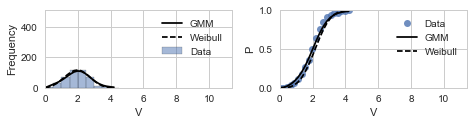

5.0 (-5.0 - 15.0) degree
data size: 436 weight 0.029846659364731652
GMM Weibull
R square 0.962226778199 0.980920133778
max diff: 0.0615751588879 0.115885007824 speed value: 2.65198159904 2.43098313246 y gmm 0.793929428268
 


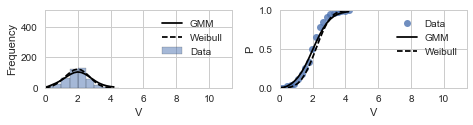

25.0 (15.0 - 35.0) degree
data size: 436 weight 0.029846659364731652
GMM Weibull
R square 0.882687880724 0.963301964187
max diff: 0.106962680514 0.164080593658 speed value: 2.42700930274 2.42700930274 y gmm 0.684321723156
 


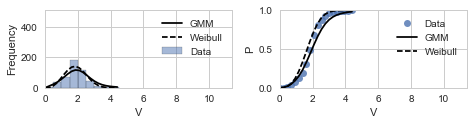

45.0 (35.0 - 55.0) degree
data size: 467 weight 0.031968784227820374
GMM Weibull
R square 0.807774343372 0.901031229222
max diff: 0.141025661224 0.162483468764 speed value: 2.31585112925 1.62109579048 y gmm 0.666254852694
 


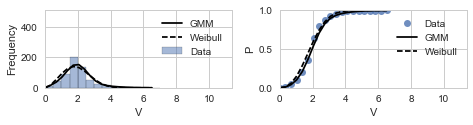

65.0 (55.0 - 75.0) degree
data size: 586 weight 0.04011500547645126
GMM Weibull
R square 0.918350159133 0.870348798872
max diff: 0.0925131341242 0.087863836954 speed value: 2.05811363086 1.71509469238 y gmm 0.545712121849
 


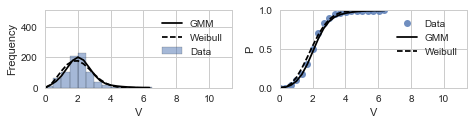

85.0 (75.0 - 95.0) degree
data size: 790 weight 0.05407995618838992
GMM Weibull
R square 0.954641374066 0.900978059674
max diff: 0.0801343673198 0.0821081168373 speed value: 2.34707215449 1.67648011035 y gmm 0.633789683313
 


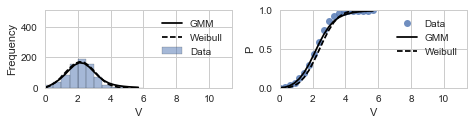

105.0 (95.0 - 115.0) degree
data size: 742 weight 0.05079408543263965
GMM Weibull
R square 0.956279608553 0.971922754357
max diff: 0.0739441193588 0.11850441019 speed value: 2.98988708614 2.69089837753 y gmm 0.788589573364
 


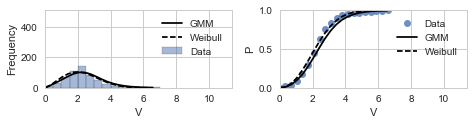

125.0 (115.0 - 135.0) degree
data size: 564 weight 0.038608981380065716
GMM Weibull
R square 0.887198599178 0.907481075114
max diff: 0.126224331718 0.0549025310865 speed value: 2.76718946815 2.76718946815 y gmm 0.639733115091
 


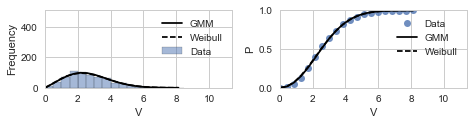

145.0 (135.0 - 155.0) degree
data size: 654 weight 0.04476998904709748
GMM Weibull
R square 0.966416545851 0.966464926435
max diff: 0.0264642613809 0.0264037359006 speed value: 2.56863088477 1.28431544239 y gmm 0.511762038313
 


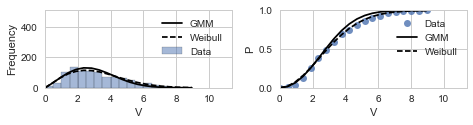

165.0 (155.0 - 175.0) degree
data size: 955 weight 0.0653751369112815
GMM Weibull
R square 0.870435505636 0.911649952773
max diff: 0.07909594111 0.0352250959621 speed value: 4.23866961862 0.941926581914 y gmm 0.825692799749
 


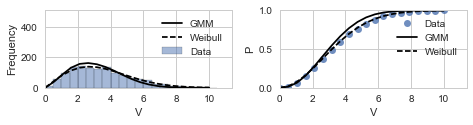

185.0 (175.0 - 195.0) degree
data size: 1271 weight 0.08700711938663745
GMM Weibull
R square 0.920883559266 0.975022416176
max diff: 0.0856587005616 0.020231601187 speed value: 4.74042655381 5.79385467688 y gmm 0.851197646274
 


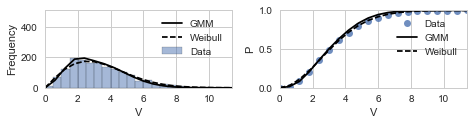

205.0 (195.0 - 215.0) degree
data size: 1555 weight 0.10644852135815991
GMM Weibull
R square 0.981427185781 0.972216006966
max diff: 0.0379806494886 0.0273381628718 speed value: 5.9932203827 1.19864407654 y gmm 0.946019234698
 


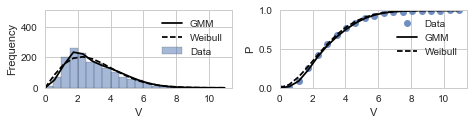

225.0 (215.0 - 235.0) degree
data size: 1604 weight 0.10980284775465499
GMM Weibull
R square 0.979776913853 0.93500341653
max diff: 0.0225896805479 0.057844471661 speed value: 3.45734806919 1.1524493564 y gmm 0.65633800025
 


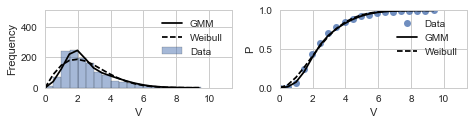

245.0 (235.0 - 255.0) degree
data size: 1301 weight 0.08906078860898138
GMM Weibull
R square 0.957441720106 0.882163822288
max diff: 0.0417619111944 0.0704111620873 speed value: 1.9734859469 0.986742973452 y gmm 0.389444852833
 


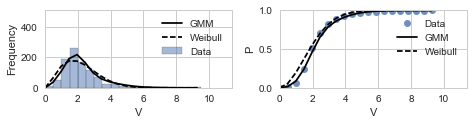

265.0 (255.0 - 275.0) degree
data size: 966 weight 0.06612814895947426
GMM Weibull
R square 0.955598740604 0.884955800043
max diff: 0.068110470798 0.131830922994 speed value: 1.95114882819 0.975574414093 y gmm 0.452593462949
 


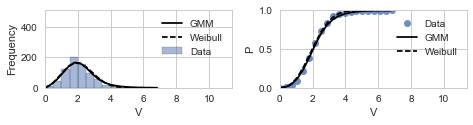

285.0 (275.0 - 295.0) degree
data size: 730 weight 0.04997261774370208
GMM Weibull
R square 0.964082189623 0.956671973167
max diff: 0.0408998041169 0.0540247937308 speed value: 3.23557414117 1.43803295163 y gmm 0.882387867116
 


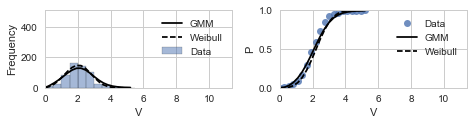

305.0 (295.0 - 315.0) degree
data size: 579 weight 0.03963581599123768
GMM Weibull
R square 0.908126217577 0.964788894203
max diff: 0.0833461255018 0.109655631614 speed value: 2.73824905211 1.91677433648 y gmm 0.766394807141
 


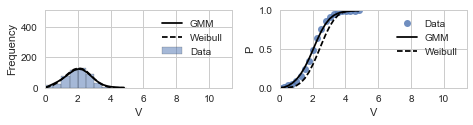

325.0 (315.0 - 335.0) degree
data size: 499 weight 0.03415936473165389
GMM Weibull
R square 0.97564977169 0.989169468705
max diff: 0.0343142998222 0.213370514572 speed value: 2.7884552429 2.28146338056 y gmm 0.825405139056
 


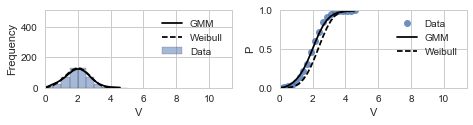

345.0 (335.0 - 355.0) degree
data size: 473 weight 0.03237951807228916
GMM Weibull
R square 0.973172898993 0.98797594694
max diff: 0.0439935069825 0.196855332644 speed value: 2.64376743489 2.16308244673 y gmm 0.805900784772
 
Wall time: 57.2 s


In [95]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)

0.9420033338771728 0.9376497846666043


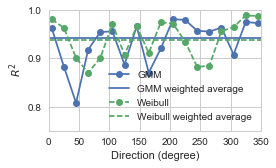

In [96]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.06271225316356939 0.07985872236983707


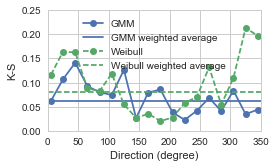

In [97]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

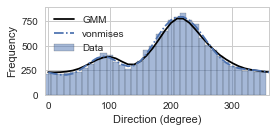

In [98]:
# Compare direction weight with previous figure
display(dir_fig)

# 7. Energy Evaluation

In [99]:
# x = arange(0, max_speed, 0.5)
# y_ =[]
# for x_ in x:
#     def sub_f(theta, V=x_):
#         return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#     y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
# y = array(list(zip(*y_))[0])
# plot(x, y)

In [100]:
# for rad in  linspace(0,2*pi, num=9):
#     x = arange(0, max_speed, 0.5)
#     y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
#     plot(x, y, label=rad/pi*180)
# plt_configure(legend=True, 
#               xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
#               figsize=(4.5,3.5))

In [101]:
# for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
#     rads = linspace(0,2*pi, num=40)
#     y_ =[]
#     for rad in rads:
#         def sub_f(V,theta=rad):
#             return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#         y_.append(integrate.nquad(sub_f, [integrate_interval]))
#     y = array(list(zip(*y_))[0])
#     plot(rads/pi*180, y, line_style, label=str(integrate_interval)+bare_speed_unit_text)
# plt_configure(legend=True, 
#               xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
#               figsize=(4.5,3.5))

# 7. Result Variability & Cross-Validation

In [102]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.4 square_error


## 7.1  Result Variability

In [103]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(20))         

Wall time: 23 s


number of estimated clusters : 2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000189D1048>]], dtype=object)

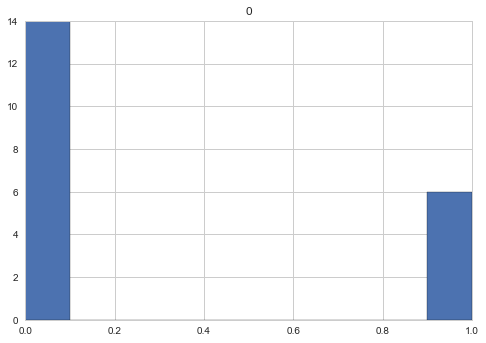

In [104]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = []
for result in results:
    X.append(result['gmm'][0][0:3])
X= np.asarray(X)

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

pd.DataFrame(ms.labels_).hist()

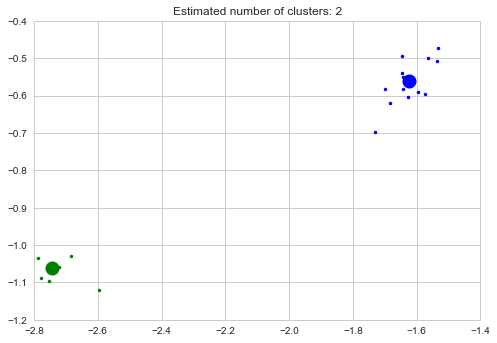

In [105]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 1], X[my_members, 2], col + '.')
    plt.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

for result, label in zip(results, ms.labels_) :
    result['cluster_num']=label

Cluster Number: 0


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.630  -1.535  -0.508  1.931  1.989   0.163
2  0.148  -0.489  -1.432  0.932  0.727  -0.279
3  0.125   0.353   1.750  1.024  0.758  -0.458
4  0.097   1.799  -0.652  0.673  1.199   0.236

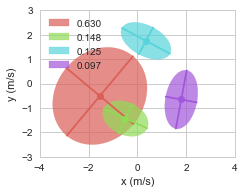

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.055      0.098      245.238  7.842398e-07      0.016       0.141

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.054      0.092      246.285  7.200554e-07      0.015       0.135

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.603  -1.646  -0.540  1.915  1.975   0.167
2  0.166  -0.413  -1.418  0.994  0.785  -0.350
3  0.131   0.224   1.784  1.039  0.776  -0.397
4  0.099   1.824  -0.434  0.674  1.150   0.208

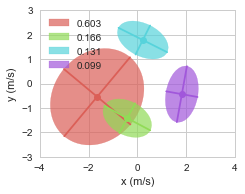

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.057      0.088      285.743  6.358624e-07      0.015       0.127

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.053      0.083      240.135  7.810129e-07      0.016       0.141

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.620  -1.563  -0.500  1.910  1.967   0.165
2  0.159  -0.410  -1.467  0.968  0.716  -0.309
3  0.126   0.318   1.761  1.026  0.733  -0.370
4  0.094   1.820  -0.483  0.652  1.136   0.169

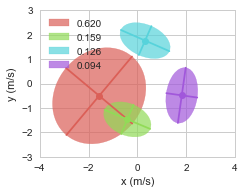

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.052      0.113      390.864  7.368797e-07      0.015       0.137

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.055      0.088      256.387  6.665129e-07      0.015       0.130

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.621  -1.617  -0.564  1.943  1.921   0.188
2  0.147  -0.408  -1.478  0.953  0.714  -0.292
3  0.133   0.191   1.793  1.008  0.751  -0.383
4  0.100   1.830  -0.534  0.694  1.236   0.240

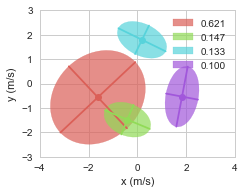

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.048      0.086      291.389  7.065681e-07      0.015       0.134

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.052      0.084      279.489  7.454922e-07      0.015       0.138

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.591  -1.596  -0.590  1.911  1.932   0.158
2  0.161  -0.431  -1.478  0.957  0.742  -0.317
3  0.141   0.245   1.795  1.003  0.750  -0.369
4  0.107   1.783  -0.479  0.683  1.157   0.243

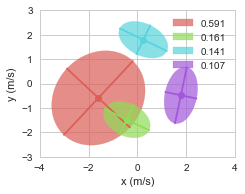

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.057      0.096      326.640  7.389968e-07      0.015       0.137

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.056      0.087      298.106  6.731333e-07      0.015       0.131


Cluster Number: 1


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.327  -2.754  -1.095  1.765  1.978  -0.108
2  0.275   0.483   1.468  1.282  1.033  -0.510
3  0.242   0.343  -1.448  1.470  0.787   0.183
4  0.156  -1.168  -0.537  0.868  1.246  -0.448

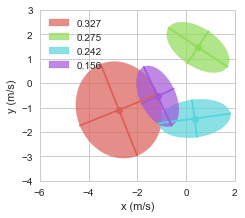

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.989  0.047      0.684  1482785.003  0.000001      0.020       0.176

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.988  0.042      0.378   716636.969  0.000001      0.020       0.182

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.323  -2.721  -1.059  1.724  1.864  -0.120
2  0.275   0.442   1.526  1.315  0.993  -0.511
3  0.250   0.339  -1.412  1.523  0.853   0.235
4  0.152  -1.146  -0.598  0.852  1.209  -0.491

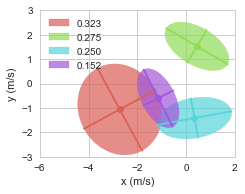

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.988  0.055      1.102  6141669.491  0.000001      0.020       0.181

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.987  0.052      0.821  5328070.589  0.000001      0.021       0.185

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.330  -2.597  -1.119  1.756  1.892  -0.087
2  0.273   0.341   1.550  1.313  0.969  -0.446
3  0.222   0.417  -1.348  1.578  0.791   0.240
4  0.174  -1.009  -0.759  1.034  1.243  -0.596

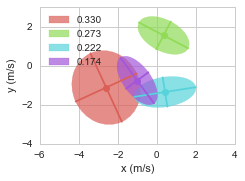

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.989  0.051      0.231    78354.122  0.000001      0.020       0.176

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.987  0.064      0.434   983183.405  0.000001      0.021       0.190

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.327  -2.683  -1.029  1.792  1.922  -0.053
2  0.272   0.442   1.489  1.324  1.056  -0.524
3  0.264   0.223  -1.443  1.545  0.811   0.176
4  0.136  -1.140  -0.479  0.901  1.294  -0.545

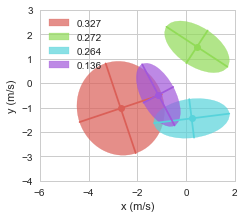

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.990  0.037      0.228   120337.697  0.000001      0.018       0.161

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.988  0.045      0.270   229981.658  0.000001      0.020       0.182

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.312  -2.778  -1.088  1.737  1.884  -0.128
2  0.264   0.422   1.546  1.294  0.972  -0.476
3  0.258   0.393  -1.425  1.544  0.877   0.240
4  0.167  -1.115  -0.588  0.914  1.232  -0.522

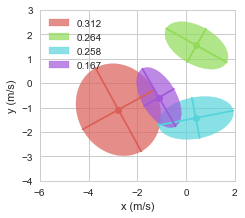

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.988  0.055      0.794  5809410.124  0.000001      0.020       0.178

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.988  0.050      0.859  6322001.419  0.000001      0.020       0.181

In [106]:
for cluster_num in arange(0, n_clusters_):
    print('Cluster Number:', cluster_num)
    display_num = 0
    for result in results:
        if result['cluster_num'] == cluster_num:
            display_num = display_num+1
            display(pretty_print_gmm(result['gmm']))
            fig,ax = plt.subplots(figsize=(3.5,3.5))
            plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
            plt.show()

            display(gof_df(result['gmm_pdf_result'], result['kde_result']))
            display(gof_df(result['gmm_pdf_result'], kde_result))
            print('')
        if display_num == 5:
            break

## 7.2 Cross-validation, to select the number of Gaussian

In [107]:
# %%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 10956.0 3652.0
  
Number of gaussian 1
Train


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.627475    437.631124  0.246895  0.000016    0.072515     0.645823   
1    0.600970    419.116805  0.239495  0.000016    0.072269     0.629819   
2    0.615345    450.599898  0.239692  0.000016    0.072289     0.640862   
3    0.630909    464.936653  0.247000  0.000017    0.071253     0.649603   

   R_square  
0  0.845807  
1  0.853390  
2  0.849081  
3  0.847552

Test


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.627428    516.740290  0.224472  0.000016    0.066695     0.634592   
1    0.707566    660.343745  0.264720  0.000018    0.071433     0.675658   
2    0.655750    503.215864  0.247347  0.000016    0.071844     0.647125   
3    0.675153    751.587035  0.272732  0.000017    0.079703     0.657918   

   R_square  
0  0.856303  
1  0.836425  
2  0.847679  
3  0.834719

  
Number of gaussian 2
Train


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.494225    381.964829  0.207749  0.000007    0.046108     0.416729   
1    0.519447    392.031225  0.210566  0.000007    0.048630     0.436450   
2    0.520083    433.713068  0.212263  0.000007    0.049369     0.433897   
3    0.496391    365.112795  0.214757  0.000007    0.048544     0.427259   

   R_square  
0  0.936517  
1  0.930506  
2  0.930522  
3  0.932722

Test


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.597647    450.855715  0.202953  0.000009    0.056966     0.483652   
1    0.495464    410.567870  0.192550  0.000007    0.048686     0.422524   
2    0.534850    426.873084  0.226614  0.000008    0.047522     0.438964   
3    0.600949    623.515373  0.231766  0.000008    0.049118     0.453165   

   R_square  
0  0.913632  
1  0.933591  
2  0.930891  
3  0.925984

  
Number of gaussian 3
Train


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.171857    312.898154  0.065849  0.000002    0.027537     0.246079   
1    0.162333    260.414460  0.069948  0.000002    0.027310     0.248186   
2    0.158733    280.525278  0.065882  0.000002    0.028215     0.245809   
3    0.235718    708.103403  0.086341  0.000002    0.028017     0.248431   

   R_square  
0  0.977899  
1  0.977346  
2  0.977619  
3  0.977470

Test


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.222797    385.390411  0.076251  0.000003    0.032163     0.282852   
1    0.183164    341.060292  0.064238  0.000003    0.031514     0.277427   
2    0.224032    322.738274  0.119997  0.000003    0.030164     0.285584   
3    0.274182    498.021008  0.068047  0.000003    0.031002     0.279062   

   R_square  
0  0.970249  
1  0.972034  
2  0.970986  
3  0.971063

  
Number of gaussian 4
Train


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.079472     244.656732  0.052185  6.572934e-07    0.014482     0.129174   
1    0.075364     235.491424  0.047929  5.974833e-07    0.013969     0.123002   
2    0.442450  921362.711241  0.053325  1.107946e-06    0.018683     0.167911   
3    0.072865     255.195193  0.049260  6.026777e-07    0.013911     0.123684   

   R_square  
0  0.993862  
1  0.994450  
2  0.989630  
3  0.994407

Test


Chi_square   Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.118861     355.096245  0.051740  0.000001    0.018817     0.166606   
1    0.128050     449.075326  0.067555  0.000001    0.018520     0.170177   
2    0.416656  818686.069496  0.103244  0.000003    0.029280     0.255395   
3    0.117958     269.053823  0.061852  0.000001    0.021656     0.193366   

   R_square  
0  0.989917  
1  0.989379  
2  0.976353  
3  0.986189

  
Number of gaussian 5
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.036158    202.331014  0.031333  2.726779e-07    0.009283     0.083260   
1    0.114483  43524.985361  0.040860  2.937567e-07    0.009653     0.086332   
2    0.046499    987.047599  0.027199  3.049040e-07    0.009789     0.087961   
3    0.058770   1996.986922  0.033190  3.242103e-07    0.010418     0.090689   

   R_square  
0  0.997451  
1  0.997262  
2  0.997176  
3  0.996973

Test


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.112957    781.073082  0.095310  0.000002    0.022632     0.201066   
1    0.169135  84838.375111  0.075107  0.000001    0.019490     0.170972   
2    0.103001    674.680306  0.057138  0.000001    0.019028     0.164516   
3    0.110747   1927.725720  0.077275  0.000001    0.019027     0.180543   

   R_square  
0  0.985346  
1  0.989342  
2  0.989942  
3  0.988211

In [108]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    0.618675     443.071120  0.243270  1.621481e-05    0.072082     0.641527   
2    0.507537     393.205479  0.211334  7.238505e-06    0.048163     0.428583   
3    0.182160     390.485324  0.072005  2.405901e-06    0.027770     0.247126   
4    0.167538  230524.513647  0.050675  7.413501e-07    0.015261     0.135943   
5    0.063977   11677.837724  0.033145  2.988872e-07    0.009786     0.087060   

   R_square  
1  0.848957  
2  0.932567  
3  0.977583  
4  0.993087  
5  0.997216

Test gof mean, std


Chi_square   Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
1    0.666474     607.971733  0.252318  0.000017    0.072419     0.653824   
2    0.557228     477.953010  0.213471  0.000008    0.050573     0.449576   
3    0.226044     386.802496  0.082133  0.000003    0.031211     0.281231   
4    0.195381  204939.823723  0.071098  0.000002    0.022068     0.196386   
5    0.123960   22055.463555  0.076207  0.000001    0.020044     0.179274   

   R_square  
1  0.843782  
2  0.926025  
3  0.971083  
4  0.985459  
5  0.988210

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


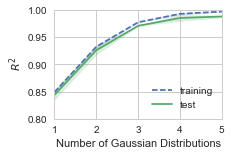

K_S


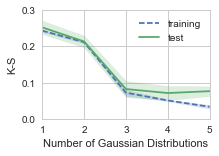

Chi_square


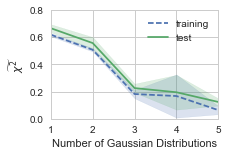

MSE


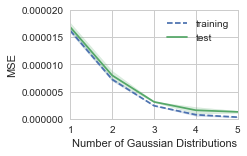

In [109]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square','MSE'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $","MSE"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [110]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)
# for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
#             fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
#     display(fig)

In [111]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

47N123W
